# CSE603: Machine Learning - II

# Final - Project

# Analysis of Statistical Inference Methods vs Traditional ML 

### Submitted by:
#### Name      : Muhammad Amin Ghias
#### ERP ID    : 25366

Date : 31st January 2022

# Analysis on Datasets for Classification

# Classification Dataset # 3

# Importing Libraraies

In [1]:
import pandas as pd
import pymc3 as pm
import numpy as np
import theano.tensor as tt
import matplotlib.pyplot as plt

# %matplotlib inline
import arviz as az
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import graphviz
import os


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:


import lazypredict
from lazypredict.Supervised import LazyRegressor

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing

import matplotlib.pyplot as plt

import seaborn as sns

from scipy.stats import skew
from scipy.stats import kurtosis

from sklearn.feature_selection import mutual_info_classif

from sklearn.feature_selection import mutual_info_regression

from sklearn.decomposition import PCA

import time

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline


import warnings 
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder

import time


from numpy import mean



from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# import statsmodels.api as sm
from sklearn.feature_selection import SequentialFeatureSelector
import os

import matplotlib
import seaborn as sns

import plotly.express as px

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from sklearn.linear_model import LassoCV
import warnings 
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score




cv = KFold(n_splits=10, random_state=1, shuffle=True)
# reg = LinearRegression()


from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score


from numpy.random import normal
from numpy.random import exponential
import random
import re

import plotly.express as px
import plotly.graph_objects as go

from sklearn.feature_selection import mutual_info_regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
pd.set_option('display.max_columns', 500)

from lazypredict.Supervised import LazyClassifier


## Getting Dataeset

In [7]:
df=pd.read_csv('data_banknote_authentication.csv',names=['variance','skewness','kurtosis','entropy','class'])
print(df.shape)
df.head()

(1372, 5)


variance  skewness  kurtosis  entropy  class
0      3.62      8.67     -2.81    -0.45      0
1      4.55      8.17     -2.46    -1.46      0
2      3.87     -2.64      1.92     0.11      0
3      3.46      9.52     -4.01    -3.59      0
4      0.33     -4.46      4.57    -0.99      0

In [8]:
df.to_csv('data_banknote_authentication-h.csv',index=False)

In [9]:
df_c=df.copy()

In [10]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [11]:
df.columns

Index(['variance', 'skewness', 'kurtosis', 'entropy', 'class'], dtype='object')

### Data set details

### Dataset Title: banknote authentication Data Set

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

The data was obtained from UCI Machine Learning Repository:

https://archive.ics.uci.edu/ml/datasets/banknote+authentication



#### Attribute Information:


1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

## EDA

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   kurtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [16]:
df.describe()

variance  skewness  kurtosis  entropy   class
count   1372.00   1372.00   1372.00  1372.00 1372.00
mean       0.43      1.92      1.40    -1.19    0.44
std        2.84      5.87      4.31     2.10    0.50
min       -7.04    -13.77     -5.29    -8.55    0.00
25%       -1.77     -1.71     -1.57    -2.41    0.00
50%        0.50      2.32      0.62    -0.59    0.00
75%        2.82      6.81      3.18     0.39    1.00
max        6.82     12.95     17.93     2.45    1.00

[None, None, None, None, None, None]

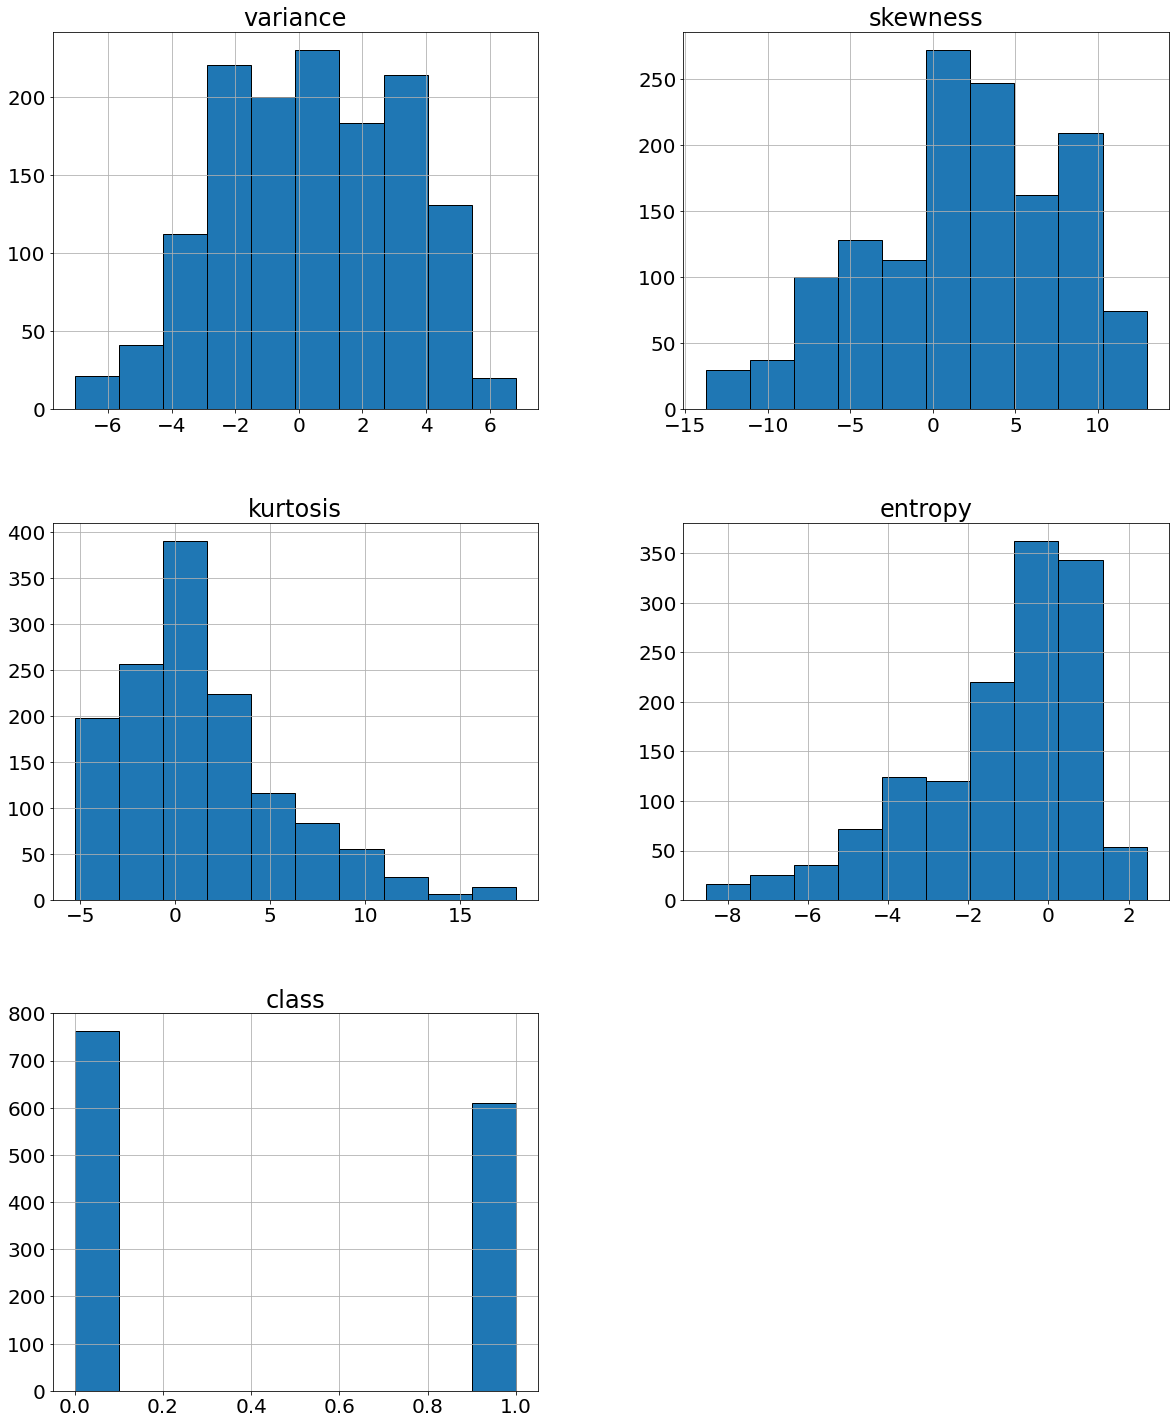

In [17]:
%matplotlib inline

fig= df.hist(xlabelsize=20,ylabelsize=20,ec="k",figsize=(20,25))
[x.title.set_size(24) for x in fig.ravel()]


All the features are highly skewed

In [18]:
df.isna().sum()

variance    0
skewness    0
kurtosis    0
entropy     0
class       0
dtype: int64

#### Dropping the NaN values

In [19]:
print(df.shape)
df=df.dropna()
df.shape

(1372, 5)


(1372, 5)

In [20]:
# df=df.drop(columns=['subject#'])

### Applying log transformation with add 1 to make the dataset distributions more towards normal distribution and rescale the features within range and resuces the skewness from the dataset

In [21]:
df_log=np.log1p(df)

#### Applying standard scaling

In [22]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()
X2_Scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(X2_Scaled)
df_scaled.columns = df.columns


In [24]:
df_log.corr()

variance  skewness  kurtosis  entropy  class
variance      1.00      0.18      0.01     0.10  -0.61
skewness      0.18      1.00     -0.25    -0.28  -0.35
kurtosis      0.01     -0.25      1.00    -0.08   0.02
entropy       0.10     -0.28     -0.08     1.00   0.01
class        -0.61     -0.35      0.02     0.01   1.00

## Correlation

In [25]:
df.corr()

variance  skewness  kurtosis  entropy  class
variance      1.00      0.26     -0.38     0.28  -0.72
skewness      0.26      1.00     -0.79    -0.53  -0.44
kurtosis     -0.38     -0.79      1.00     0.32   0.16
entropy       0.28     -0.53      0.32     1.00  -0.02
class        -0.72     -0.44      0.16    -0.02   1.00

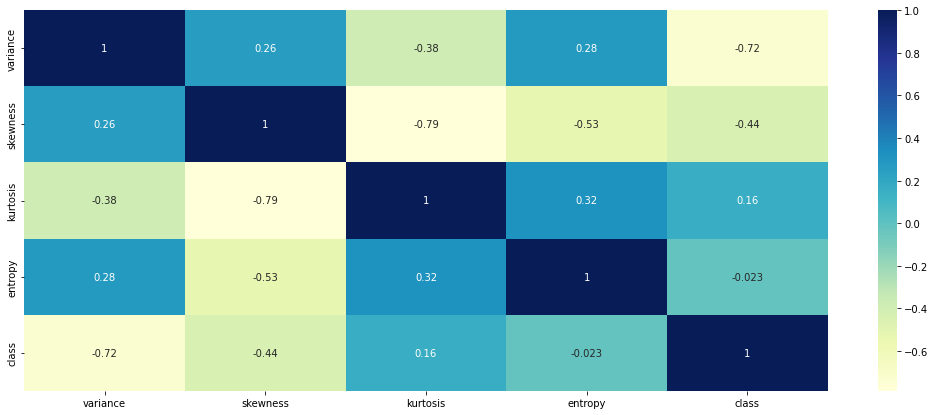

In [26]:
cor=df.corr()
plt.figure(figsize=(18, 7))
dataplot = sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

## Feature Selection

In [27]:
df.isna().sum()

variance    0
skewness    0
kurtosis    0
entropy     0
class       0
dtype: int64

### for df_scaled

In [28]:
df.columns

Index(['variance', 'skewness', 'kurtosis', 'entropy', 'class'], dtype='object')

In [29]:
dfs = pd.DataFrame()

X=df_scaled.drop(columns=['class'])
y=df['class']


trainX=X
trainy=y
testX=X
testy=y

discrete_features = X.dtypes == int


mi_scores_d = mutual_info_classif(trainX, trainy, discrete_features=discrete_features)
    
mi_scores_d = pd.Series(mi_scores_d, name="MI Scores", index=trainX.columns)


dfs['MI']=mi_scores_d

## Feature selection using random forrest and gradient boosting

clfRF = RandomForestClassifier(max_depth=5, max_features=4, min_samples_split=8,
                  n_estimators=100)#, random_state=0)
clfRF.fit(trainX, trainy)
importance_rf = pd.Series(clfRF.feature_importances_, index=trainX.columns)


clfGB = GradientBoostingClassifier(max_depth=2,n_estimators=50)#, random_state=0)
clfGB.fit(trainX, trainy)
importance_GB = pd.Series(clfGB.feature_importances_, index=trainX.columns)


clfdt = DecisionTreeClassifier(max_depth=5)
clfdt.fit(trainX, trainy)
importance_dt = pd.Series(clfdt.feature_importances_, index=trainX.columns)

cor=df_log.corr()


cor_target = abs(cor['class'])

cor_target = pd.Series(cor_target, name="Correlation", index=trainX.columns)

dfs['Decission_Tree']=importance_dt

dfs['Random_Forrest']=importance_rf

dfs['Gradient_Boosting']=importance_GB

dfs['Correlation_Default']=cor_target

dfs['sum']=dfs.sum(axis=1)

dfs.sort_values('sum',ascending=False)


MI  Decission_Tree  Random_Forrest  Gradient_Boosting  \
variance 0.38            0.63            0.62               0.65   
skewness 0.23            0.22            0.22               0.23   
kurtosis 0.12            0.14            0.14               0.13   
entropy  0.02            0.02            0.02               0.00   

          Correlation_Default  sum  
variance                 0.61 2.89  
skewness                 0.35 1.24  
kurtosis                 0.02 0.54  
entropy                  0.01 0.06

#### for df

In [30]:
dfs = pd.DataFrame()


X=df.drop(columns=['class'])
y=df['class']


trainX=X
trainy=y
testX=X
testy=y

discrete_features = X.dtypes == int


mi_scores_d = mutual_info_regression(trainX, trainy, discrete_features=discrete_features)
    
mi_scores_d = pd.Series(mi_scores_d, name="MI Scores", index=trainX.columns)

dfs['MI']=mi_scores_d

## Feature selection using random forrest and gradient boosting

clfRF = RandomForestRegressor(max_depth=5, max_features=4, min_samples_split=8,
                  n_estimators=100)#, random_state=0)
clfRF.fit(trainX, trainy)
importance_rf = pd.Series(clfRF.feature_importances_, index=trainX.columns)


clfGB = GradientBoostingRegressor(max_depth=2,n_estimators=50)#, random_state=0)
clfGB.fit(trainX, trainy)
importance_GB = pd.Series(clfGB.feature_importances_, index=trainX.columns)


clfdt = DecisionTreeRegressor(max_depth=5)
clfdt.fit(trainX, trainy)
importance_dt = pd.Series(clfdt.feature_importances_, index=trainX.columns)

cor=df_log.corr()


cor_target = abs(cor['class'])

cor_target = pd.Series(cor_target, name="Correlation", index=trainX.columns)

dfs['Decission_Tree']=importance_dt

dfs['Random_Forrest']=importance_rf

dfs['Gradient_Boosting']=importance_GB

dfs['Correlation_Default']=cor_target

dfs['sum']=dfs.sum(axis=1)

dfs.sort_values('sum',ascending=False)


MI  Decission_Tree  Random_Forrest  Gradient_Boosting  \
variance 0.38            0.63            0.62               0.63   
skewness 0.23            0.22            0.22               0.23   
kurtosis 0.12            0.14            0.14               0.14   
entropy  0.02            0.02            0.02               0.00   

          Correlation_Default  sum  
variance                 0.61 2.87  
skewness                 0.35 1.25  
kurtosis                 0.02 0.56  
entropy                  0.01 0.06

In [31]:
dfs.shape

(4, 6)

In [32]:
dfs_s=dfs[dfs['sum']>0.3]
dfs_s.shape

(3, 6)

In [33]:
dfs_s

MI  Decission_Tree  Random_Forrest  Gradient_Boosting  \
variance 0.38            0.63            0.62               0.63   
skewness 0.23            0.22            0.22               0.23   
kurtosis 0.12            0.14            0.14               0.14   

          Correlation_Default  sum  
variance                 0.61 2.87  
skewness                 0.35 1.25  
kurtosis                 0.02 0.56

In [34]:
dfs_s.index

Index(['variance', 'skewness', 'kurtosis'], dtype='object')

### chosing the best top 3 features

In [35]:

df_ts=df_scaled[dfs_s.index] # scaled dataset

df_t=df[dfs_s.index] 


## Making X,y

## Making train and test split

In [36]:
df.columns

Index(['variance', 'skewness', 'kurtosis', 'entropy', 'class'], dtype='object')

In [37]:
X.shape

(1372, 4)

#### for df

In [38]:

X=df_t
y=df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 64)



In [39]:
X.shape

(1372, 3)

In [40]:
y_train.shape

(960,)

In [41]:
X_train.shape

(960, 3)

#### for df_scaled

In [42]:
Xs=df_ts
ys=df_scaled['class']


Xs_train, Xs_test, ys_train, ys_test = train_test_split(X, y, test_size = 0.3, random_state = 64)

In [43]:
Xs_train.shape

(960, 3)

In [44]:
df_t.describe()

variance  skewness  kurtosis
count   1372.00   1372.00   1372.00
mean       0.43      1.92      1.40
std        2.84      5.87      4.31
min       -7.04    -13.77     -5.29
25%       -1.77     -1.71     -1.57
50%        0.50      2.32      0.62
75%        2.82      6.81      3.18
max        6.82     12.95     17.93

In [45]:
df_ts.describe()

variance  skewness  kurtosis
count   1372.00   1372.00   1372.00
mean       0.00      0.00      0.00
std        1.00      1.00      1.00
min       -2.63     -2.68     -1.55
25%       -0.78     -0.62     -0.69
50%        0.02      0.07     -0.18
75%        0.84      0.83      0.41
max        2.25      1.88      3.84

In [46]:
X.describe()

variance  skewness  kurtosis
count   1372.00   1372.00   1372.00
mean       0.43      1.92      1.40
std        2.84      5.87      4.31
min       -7.04    -13.77     -5.29
25%       -1.77     -1.71     -1.57
50%        0.50      2.32      0.62
75%        2.82      6.81      3.18
max        6.82     12.95     17.93

In [47]:
Xs.describe()

variance  skewness  kurtosis
count   1372.00   1372.00   1372.00
mean       0.00      0.00      0.00
std        1.00      1.00      1.00
min       -2.63     -2.68     -1.55
25%       -0.78     -0.62     -0.69
50%        0.02      0.07     -0.18
75%        0.84      0.83      0.41
max        2.25      1.88      3.84

In [48]:
X_train.shape

(960, 3)

In [49]:
X_test.shape

(412, 3)

In [50]:
X.shape

(1372, 3)

In [51]:
X_train.shape

(960, 3)

## Using Lazy predict to rub regression models

### Making prediction on train-test dataset with lazy predict for df

In [52]:

reg = LazyClassifier(verbose=10, ignore_warnings=False, custom_metric=None)

models_1, predictions = reg.fit(X_train, X_test, y_train, y_test)


print(models_1)


  7%|▋         | 2/29 [00:00<00:05,  4.82it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9951456310679612, 'Balanced Accuracy': 0.9951123448881296, 'ROC AUC': 0.9951123448881296, 'F1 Score': 0.9951456310679612, 'Time taken': 0.2503852844238281}
{'Model': 'BaggingClassifier', 'Accuracy': 0.9902912621359223, 'Balanced Accuracy': 0.9898213395971243, 'ROC AUC': 0.9898213395971244, 'F1 Score': 0.9902871123144569, 'Time taken': 0.10255098342895508}
{'Model': 'BernoulliNB', 'Accuracy': 0.8349514563106796, 'Balanced Accuracy': 0.8394666287042969, 'ROC AUC': 0.839466628704297, 'F1 Score': 0.8351148437487486, 'Time taken': 0.026726484298706055}



 14%|█▍        | 4/29 [00:00<00:04,  6.19it/s]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.9781553398058253, 'Balanced Accuracy': 0.9794172776235557, 'ROC AUC': 0.9794172776235557, 'F1 Score': 0.9781797674647709, 'Time taken': 0.07976818084716797}
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.9878640776699029, 'Balanced Accuracy': 0.9871758369516217, 'ROC AUC': 0.9871758369516217, 'F1 Score': 0.9878560771509503, 'Time taken': 0.02189946174621582}
{'Model': 'DummyClassifier', 'Accuracy': 0.5412621359223301, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.38016206712025075, 'Time taken': 0.019301891326904297}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.9538834951456311, 'Balanced Accuracy': 0.954172301705934, 'ROC AUC': 0.954172301705934, 'F1 Score': 0.953908905494727, 'Time taken': 0.02017998695373535}


 45%|████▍     | 13/29 [00:00<00:01,  9.83it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.9975728155339806, 'Balanced Accuracy': 0.9977578475336323, 'ROC AUC': 0.9977578475336323, 'F1 Score': 0.9975732904507479, 'Time taken': 0.1915287971496582}
{'Model': 'GaussianNB', 'Accuracy': 0.837378640776699, 'Balanced Accuracy': 0.8344484779462358, 'ROC AUC': 0.8344484779462359, 'F1 Score': 0.8370037965822952, 'Time taken': 0.017659425735473633}
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9975728155339806, 'Balanced Accuracy': 0.9977578475336323, 'ROC AUC': 0.9977578475336323, 'F1 Score': 0.9975732904507479, 'Time taken': 0.023889541625976562}
{'Model': 'LabelPropagation', 'Accuracy': 0.9975728155339806, 'Balanced Accuracy': 0.9977578475336323, 'ROC AUC': 0.9977578475336323, 'F1 Score': 0.9975732904507479, 'Time taken': 0.04693245887756348}
{'Model': 'LabelSpreading', 'Accuracy': 0.9975728155339806, 'Balanced Accuracy': 0.9977578475336323, 'ROC AUC': 0.9977578475336323, 'F1 Score': 0.9975732904507479, 'Time taken': 0.05780959129333

 72%|███████▏  | 21/29 [00:01<00:00, 15.79it/s]

{'Model': 'LinearSVC', 'Accuracy': 0.9902912621359223, 'Balanced Accuracy': 0.9902246897762592, 'ROC AUC': 0.9902246897762592, 'F1 Score': 0.9902912621359223, 'Time taken': 0.026376962661743164}
{'Model': 'LogisticRegression', 'Accuracy': 0.9757281553398058, 'Balanced Accuracy': 0.976771774978053, 'ROC AUC': 0.976771774978053, 'F1 Score': 0.9757522892762576, 'Time taken': 0.031462907791137695}
{'Model': 'NearestCentroid', 'Accuracy': 0.8567961165048543, 'Balanced Accuracy': 0.854805798751987, 'ROC AUC': 0.854805798751987, 'F1 Score': 0.8566301180546928, 'Time taken': 0.015141487121582031}
{'Model': 'NuSVC', 'Accuracy': 0.9781553398058253, 'Balanced Accuracy': 0.9798206278026906, 'ROC AUC': 0.9798206278026905, 'F1 Score': 0.9781844024690606, 'Time taken': 0.0619351863861084}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.9830097087378641, 'Balanced Accuracy': 0.9818848316606164, 'ROC AUC': 0.9818848316606165, 'F1 Score': 0.9829900140064889, 'Time taken': 0.012767314910888672}
{'


 83%|████████▎ | 24/29 [00:01<00:00, 13.51it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9927184466019418, 'Balanced Accuracy': 0.9928701924217619, 'ROC AUC': 0.9928701924217619, 'F1 Score': 0.9927198713522434, 'Time taken': 0.2658426761627197}
{'Model': 'RidgeClassifier', 'Accuracy': 0.970873786407767, 'Balanced Accuracy': 0.9730941704035874, 'ROC AUC': 0.9730941704035874, 'F1 Score': 0.9709192154541357, 'Time taken': 0.013900041580200195}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.970873786407767, 'Balanced Accuracy': 0.9730941704035874, 'ROC AUC': 0.9730941704035874, 'F1 Score': 0.9709192154541357, 'Time taken': 0.01591777801513672}
{'Model': 'SGDClassifier', 'Accuracy': 0.9854368932038835, 'Balanced Accuracy': 0.984933684485254, 'ROC AUC': 0.984933684485254, 'F1 Score': 0.9854306684716853, 'Time taken': 0.015384912490844727}
{'Model': 'SVC', 'Accuracy': 0.9854368932038835, 'Balanced Accuracy': 0.9865470852017937, 'ROC AUC': 0.9865470852017938, 'F1 Score': 0.9854513735657546, 'Time taken': 0.03108048439025879}
Stacking

100%|██████████| 29/29 [00:02<00:00, 11.44it/s]

{'Model': 'XGBClassifier', 'Accuracy': 0.9975728155339806, 'Balanced Accuracy': 0.9977578475336323, 'ROC AUC': 0.9977578475336323, 'F1 Score': 0.9975732904507479, 'Time taken': 0.9325339794158936}
{'Model': 'LGBMClassifier', 'Accuracy': 0.9975728155339806, 'Balanced Accuracy': 0.9977578475336323, 'ROC AUC': 0.9977578475336323, 'F1 Score': 0.9975732904507479, 'Time taken': 0.15537786483764648}
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     1.00               1.00     1.00      1.00   
ExtraTreesClassifier               1.00               1.00     1.00      1.00   
XGBClassifier                      1.00               1.00     1.00      1.00   
LabelSpreading                     1.00               1.00     1.00      1.00   
LabelPropagation                   1.00               1.00     1.00      1.00   
KNeighborsClassifier               1.

### Lazy predict for df_scaled

In [53]:

reg = LazyClassifier(verbose=10, ignore_warnings=False, custom_metric=None)

models_1, predictions = reg.fit(Xs_train, Xs_test, y_train, y_test)

print(models_1)


 14%|█▍        | 4/29 [00:00<00:03,  6.49it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9951456310679612, 'Balanced Accuracy': 0.9951123448881296, 'ROC AUC': 0.9951123448881296, 'F1 Score': 0.9951456310679612, 'Time taken': 0.19611811637878418}
{'Model': 'BaggingClassifier', 'Accuracy': 0.9902912621359223, 'Balanced Accuracy': 0.9898213395971243, 'ROC AUC': 0.9898213395971244, 'F1 Score': 0.9902871123144569, 'Time taken': 0.07422375679016113}
{'Model': 'BernoulliNB', 'Accuracy': 0.8349514563106796, 'Balanced Accuracy': 0.8394666287042969, 'ROC AUC': 0.839466628704297, 'F1 Score': 0.8351148437487486, 'Time taken': 0.01814889907836914}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.9781553398058253, 'Balanced Accuracy': 0.9794172776235557, 'ROC AUC': 0.9794172776235557, 'F1 Score': 0.9781797674647709, 'Time taken': 0.06812191009521484}
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.9878640776699029, 'Balanced Accuracy': 0.987175


 31%|███       | 9/29 [00:00<00:02,  8.22it/s]

{'Model': 'DummyClassifier', 'Accuracy': 0.5412621359223301, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.38016206712025075, 'Time taken': 0.012593507766723633}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.9538834951456311, 'Balanced Accuracy': 0.954172301705934, 'ROC AUC': 0.954172301705934, 'F1 Score': 0.953908905494727, 'Time taken': 0.016875505447387695}
{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.9975728155339806, 'Balanced Accuracy': 0.9977578475336323, 'ROC AUC': 0.9977578475336323, 'F1 Score': 0.9975732904507479, 'Time taken': 0.17058014869689941}


 48%|████▊     | 14/29 [00:00<00:01, 11.69it/s]

{'Model': 'GaussianNB', 'Accuracy': 0.837378640776699, 'Balanced Accuracy': 0.8344484779462358, 'ROC AUC': 0.8344484779462359, 'F1 Score': 0.8370037965822952, 'Time taken': 0.020394086837768555}
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9975728155339806, 'Balanced Accuracy': 0.9977578475336323, 'ROC AUC': 0.9977578475336323, 'F1 Score': 0.9975732904507479, 'Time taken': 0.04928278923034668}
{'Model': 'LabelPropagation', 'Accuracy': 0.9975728155339806, 'Balanced Accuracy': 0.9977578475336323, 'ROC AUC': 0.9977578475336323, 'F1 Score': 0.9975732904507479, 'Time taken': 0.050659894943237305}
{'Model': 'LabelSpreading', 'Accuracy': 0.9975728155339806, 'Balanced Accuracy': 0.9977578475336323, 'ROC AUC': 0.9977578475336323, 'F1 Score': 0.9975732904507479, 'Time taken': 0.09757661819458008}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.970873786407767, 'Balanced Accuracy': 0.9730941704035874, 'ROC AUC': 0.9730941704035874, 'F1 Score': 0.9709192154541357, 'Time taken': 0.01766395


 62%|██████▏   | 18/29 [00:01<00:00, 13.57it/s]

{'Model': 'LogisticRegression', 'Accuracy': 0.9757281553398058, 'Balanced Accuracy': 0.976771774978053, 'ROC AUC': 0.976771774978053, 'F1 Score': 0.9757522892762576, 'Time taken': 0.03602147102355957}
{'Model': 'NearestCentroid', 'Accuracy': 0.8567961165048543, 'Balanced Accuracy': 0.854805798751987, 'ROC AUC': 0.854805798751987, 'F1 Score': 0.8566301180546928, 'Time taken': 0.020559310913085938}
{'Model': 'NuSVC', 'Accuracy': 0.9781553398058253, 'Balanced Accuracy': 0.9798206278026906, 'ROC AUC': 0.9798206278026905, 'F1 Score': 0.9781844024690606, 'Time taken': 0.09364700317382812}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.9830097087378641, 'Balanced Accuracy': 0.9818848316606164, 'ROC AUC': 0.9818848316606165, 'F1 Score': 0.9829900140064889, 'Time taken': 0.03203988075256348}
{'Model': 'Perceptron', 'Accuracy': 0.9660194174757282, 'Balanced Accuracy': 0.9657864142169075, 'ROC AUC': 0.9657864142169075, 'F1 Score': 0.9660194174757282, 'Time taken': 0.03681373596191406}



 72%|███████▏  | 21/29 [00:01<00:00, 16.02it/s]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.9805825242718447, 'Balanced Accuracy': 0.9820627802690582, 'ROC AUC': 0.9820627802690584, 'F1 Score': 0.9806064130914406, 'Time taken': 0.03289461135864258}



 83%|████████▎ | 24/29 [00:01<00:00, 13.04it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9927184466019418, 'Balanced Accuracy': 0.9928701924217619, 'ROC AUC': 0.9928701924217619, 'F1 Score': 0.9927198713522434, 'Time taken': 0.2931809425354004}
{'Model': 'RidgeClassifier', 'Accuracy': 0.970873786407767, 'Balanced Accuracy': 0.9730941704035874, 'ROC AUC': 0.9730941704035874, 'F1 Score': 0.9709192154541357, 'Time taken': 0.01578521728515625}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.970873786407767, 'Balanced Accuracy': 0.9730941704035874, 'ROC AUC': 0.9730941704035874, 'F1 Score': 0.9709192154541357, 'Time taken': 0.013490438461303711}
{'Model': 'SGDClassifier', 'Accuracy': 0.9854368932038835, 'Balanced Accuracy': 0.984933684485254, 'ROC AUC': 0.984933684485254, 'F1 Score': 0.9854306684716853, 'Time taken': 0.02062845230102539}
{'Model': 'SVC', 'Accuracy': 0.9854368932038835, 'Balanced Accuracy': 0.9865470852017937, 'ROC AUC': 0.9865470852017938, 'F1 Score': 0.9854513735657546, 'Time taken': 0.020328760147094727}
Stacking

100%|██████████| 29/29 [00:02<00:00, 14.32it/s]

{'Model': 'XGBClassifier', 'Accuracy': 0.9975728155339806, 'Balanced Accuracy': 0.9977578475336323, 'ROC AUC': 0.9977578475336323, 'F1 Score': 0.9975732904507479, 'Time taken': 0.43553829193115234}
{'Model': 'LGBMClassifier', 'Accuracy': 0.9975728155339806, 'Balanced Accuracy': 0.9977578475336323, 'ROC AUC': 0.9977578475336323, 'F1 Score': 0.9975732904507479, 'Time taken': 0.09299588203430176}
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     1.00               1.00     1.00      1.00   
ExtraTreesClassifier               1.00               1.00     1.00      1.00   
XGBClassifier                      1.00               1.00     1.00      1.00   
LabelSpreading                     1.00               1.00     1.00      1.00   
LabelPropagation                   1.00               1.00     1.00      1.00   
KNeighborsClassifier               1

#### So we will use dataset without any scaling

### Making a datframe to store results

In [54]:
df_results_r1=pd.DataFrame(columns=['model_name','sampling/VI_method','Accuracy_train','AUC-ROC_train',
                                    'Accuracy_test','AUC-ROC_test','model_details'])

df_results_r1

Empty DataFrame
Columns: [model_name, sampling/VI_method, Accuracy_train, AUC-ROC_train, Accuracy_test, AUC-ROC_test, model_details]
Index: []

## Logistic Regression (ML)

### Making prediction on full dataset (no scaling) with Linear Regression on df

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

reg = LogisticRegression()
reg.fit(X_train, y_train)


## for train data

y_p=reg.predict(X_train)
md_probs = reg.predict_proba(X_train)
md_probs = md_probs[:,1]
md_auc_train = roc_auc_score(y_train, md_probs)
# md_auc_train = roc_auc_score(y_train, md_probs,multi_class='ovr')
print( "Logistic Regression AUC-ROC for train data : ", md_auc_train)
accuracy_train=accuracy_score(y_train, y_p)
print('Logistic Regression accuracy for train data : ',accuracy_train)


# for test data

y_p=reg.predict(X_test)
md_probs = reg.predict_proba(X_test)
md_probs = md_probs[:,1]
md_auc_test = roc_auc_score(y_test, md_probs)
# md_auc_test = roc_auc_score(y_test, md_probs,multi_class='ovr')
print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
accuracy_test=accuracy_score(y_test, y_p)
print('Logistic Regression accuracy for test data: ',accuracy_test)


df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'NA',
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,'model_details':reg},ignore_index=True)


Logistic Regression AUC-ROC for train data :  0.9998413530819368
Logistic Regression accuracy for train data :  0.990625
Logistic Regression AUC-ROC for test data :  0.9995729233397395
Logistic Regression accuracy for test data:  0.9878640776699029


In [57]:
df_results_r1

model_name sampling/VI_method  Accuracy_train  \
0  Logistic Regression-tain/test dataste                 NA            0.99   

   AUC-ROC_train  Accuracy_test  AUC-ROC_test         model_details  
0           1.00           0.99          1.00  LogisticRegression()

### LR on train test split on df_scaled

In [58]:
from sklearn.linear_model import LinearRegression


# Xs_train, Xs_test, ys_train, ys_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

reg = LogisticRegression()
reg.fit(Xs_train, y_train)


## for train data

y_p=reg.predict(Xs_train)
md_probs = reg.predict_proba(Xs_train)
md_probs = md_probs[:,1]
md_auc_train = roc_auc_score(y_train, md_probs)
# md_auc_train = roc_auc_score(y_train, md_probs,multi_class='ovr')
print( "Logistic Regression AUC-ROC for train data : ", md_auc_train)
accuracy_train=accuracy_score(y_train, y_p)
print('Logistic Regression accuracy for train data : ',accuracy_train)


## for test data

y_p=reg.predict(Xs_test)
md_probs = reg.predict_proba(Xs_test)
md_probs = md_probs[:,1]
md_auc_test = roc_auc_score(y_test, md_probs)
# md_auc_test = roc_auc_score(y_test, md_probs,multi_class='ovr')
print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
accuracy_test=accuracy_score(y_test, y_p)
print('Logistic Regression accuracy for test data: ',accuracy_test)


df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'NA',
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,'model_details':reg},ignore_index=True)


Logistic Regression AUC-ROC for train data :  0.9998413530819368
Logistic Regression accuracy for train data :  0.990625
Logistic Regression AUC-ROC for test data :  0.9995729233397395
Logistic Regression accuracy for test data:  0.9878640776699029


In [59]:
df_results_r1

model_name sampling/VI_method  Accuracy_train  \
0  Logistic Regression-tain/test dataste                 NA            0.99   
1  Logistic Regression-tain/test dataste                 NA            0.99   

   AUC-ROC_train  Accuracy_test  AUC-ROC_test         model_details  
0           1.00           0.99          1.00  LogisticRegression()  
1           1.00           0.99          1.00  LogisticRegression()

array([[<AxesSubplot:title={'center':'variance'}>,
        <AxesSubplot:title={'center':'skewness'}>],
       [<AxesSubplot:title={'center':'kurtosis'}>, <AxesSubplot:>]],
      dtype=object)

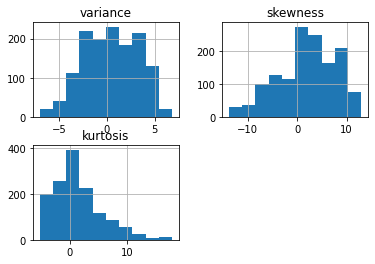

In [60]:
X.hist()

array([[<AxesSubplot:title={'center':'variance'}>,
        <AxesSubplot:title={'center':'skewness'}>],
       [<AxesSubplot:title={'center':'kurtosis'}>, <AxesSubplot:>]],
      dtype=object)

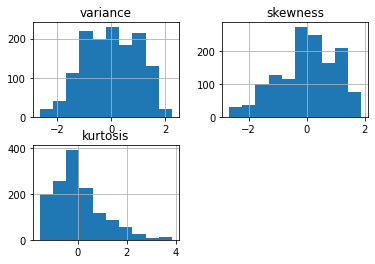

In [61]:
Xs.hist()

#### Making variables for pymc models

In [63]:

Xv=X.values
yv=y.values
Xv_train=X_train.values
Xv_test=X_test.values
print(Xv_train.shape,Xv_test.shape)

yv_train=y_train.values
yv_test=y_test.values
print(yv_train.shape,yv_test.shape)


(960, 3) (412, 3)
(960,) (412,)


In [64]:
Xs.shape

(1372, 3)

In [65]:
Xsv=Xs.values
ysv=y.values
Xsv_train=Xs_train.values
Xsv_test=Xs_test.values
print(Xsv_train.shape,Xsv_test.shape)

ysv_train=ys_train.values
ysv_test=ys_test.values

(960, 3) (412, 3)


### making vars for prior for each feature for df

In [66]:
X.columns

Index(['variance', 'skewness', 'kurtosis'], dtype='object')

### making vars for prior for each feature for df_scaled

### Selection of priors



## Applying MCMC

#### Note: We have used slice as the starting  sampling method to chose our best prior as it is the fastest sampler and as NUTS was giving chain breaking error

### Doing Logistic Regression using MCMC

In [67]:
yv_train.shape

(960,)

#### Using generic priors

In [68]:
Xv_train.shape

(960, 3)

### Generic prior 1

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 59 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.9998677942349472
Logistic Regression accuracy :  0.9927083333333333
Logistic Regression accuracy for test data :  0.41019417475728154
Logistic Regression AUC-ROC for test data :  0.2826654328896481


'0.99'

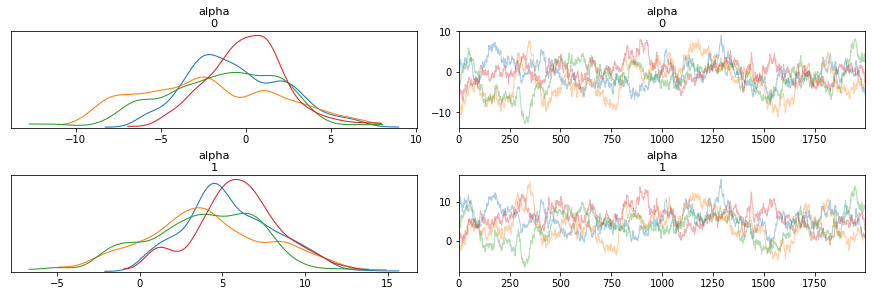

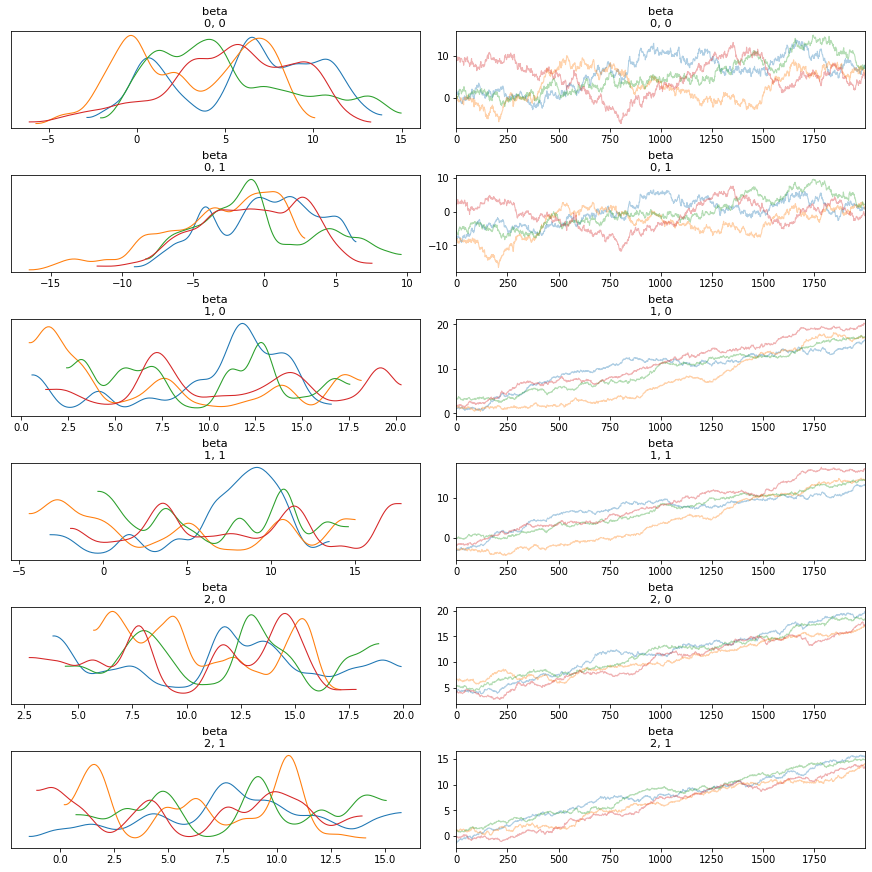

In [69]:
import theano as tt
tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

with pm.Model() as model_mclass:
    alpha = pm.Normal('alpha', mu=0, sd=5, shape=2)
    beta = pm.Normal('beta', mu=0, sd=5, shape=(3,2))
    μ = pm.Deterministic('μ', alpha + pm.math.dot(Xv_train, beta))
    θ = tt.tensor.nnet.softmax(μ)

    yl = pm.Categorical('yl', p=θ, observed=yv_train)
    
    step = pm.Slice()

    trace_s = pm.sample(2000,step)
#     trace_s = pm.sample(2000,step, tune=1000)
    
#     trace_s = pm.sample(2000)

data_pred = trace_s['μ'].mean(0)
y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

p=y_pred
p=np.array(p)
md_probs = p[:,1]
md_auc_train = roc_auc_score(yv_train,md_probs)
# md_auc_train = roc_auc_score(yv_train, p,multi_class='ovr')
print( "Logistic Regression AUC-ROC : ", md_auc_train)

accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
print( "Logistic Regression accuracy : ", accuracy_train)


az.plot_trace(trace_s, var_names=['alpha'])
az.plot_trace(trace_s, var_names=['beta'])
f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'


## Calculating the probs for y=1
a=trace_s['alpha']
a=np.mean(a,0)
alph=a[1]

b=trace_s['beta']
b=np.mean(b,0)
bet=b[:,1]

y_mu = alph + bet[0]*Xv_test[:,0] + bet[1]*Xv_test[:,1]+ bet[2]*Xv_test[:,2]

ep=(1/(1+np.exp(-y_mu)))

dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})
dy.head()

dy.replace([np.inf, -np.inf], np.nan, inplace=True)

dy=dy.dropna()
dy.shape

try:

    md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
    # md_auc_test

    accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
    print( "Logistic Regression accuracy for test data : ",accuracy_test)

    print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
    
except:
    md_auc_test = 'NA'
    accuracy_test='NA'



df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'Slice',
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'model_details':model_mclass},ignore_index=True)

f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'


In [70]:
df_results_r1

model_name sampling/VI_method  Accuracy_train  \
0  Logistic Regression-tain/test dataste                 NA            0.99   
1  Logistic Regression-tain/test dataste                 NA            0.99   
2  Logistic Regression-tain/test dataste              Slice            0.99   

   AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
0           1.00           0.99          1.00   
1           1.00           0.99          1.00   
2           1.00           0.41          0.28   

                                  model_details  
0                          LogisticRegression()  
1                          LogisticRegression()  
2  <pymc3.model.Model object at 0x7f61848eb0d0>

#### Generic piror 2

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 38 seconds.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.9998501667996068
Logistic Regression accuracy :  0.9885416666666667
Logistic Regression accuracy for test data :  0.6456310679611651
Logistic Regression AUC-ROC for test data :  0.7276199966782926


'0.99'

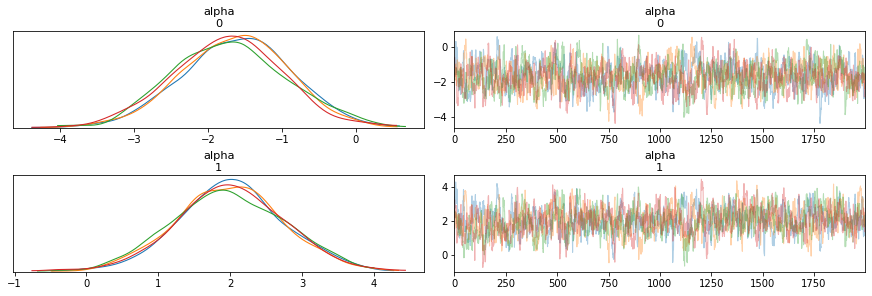

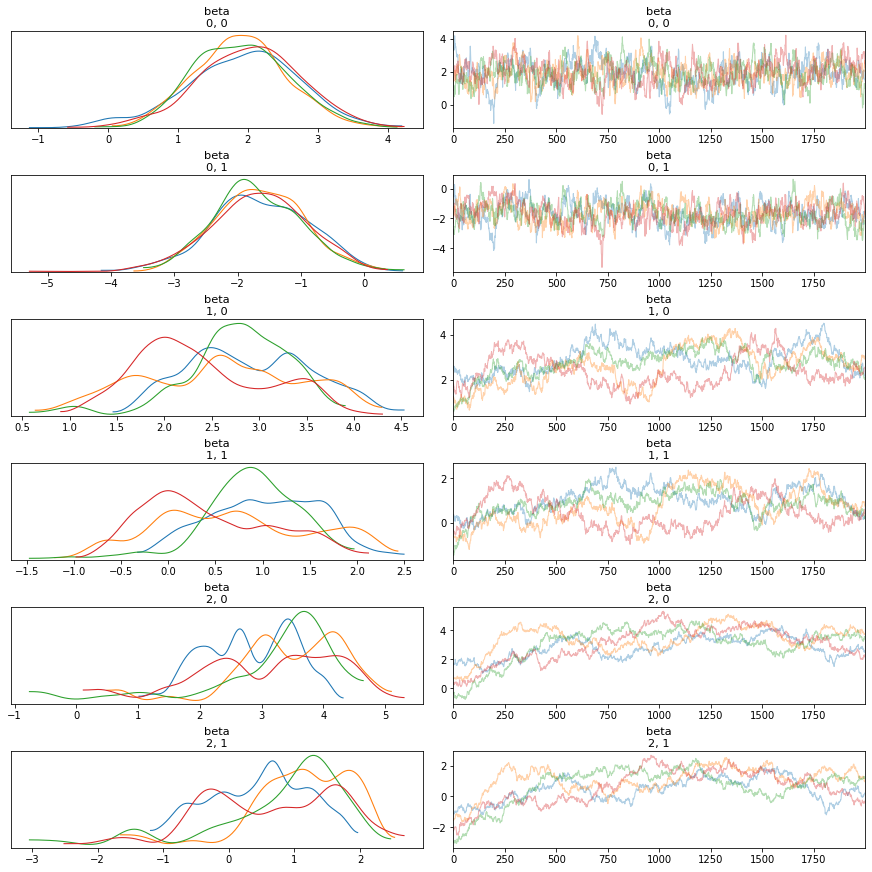

In [71]:
import theano as tt
tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

with pm.Model() as model_mclass:
    alpha = pm.Normal('alpha', mu=0, sd=1, shape=2)
    beta = pm.Normal('beta', mu=0, sd=1, shape=(3,2))
    μ = pm.Deterministic('μ', alpha + pm.math.dot(Xv_train, beta))
    θ = tt.tensor.nnet.softmax(μ)
    #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
    yl = pm.Categorical('yl', p=θ, observed=yv_train)
    
    step = pm.Slice()
    trace_s = pm.sample(2000,step)
#     trace_s = pm.sample(2000,step, tune=1000)
    
#     trace_s = pm.sample(2000)

data_pred = trace_s['μ'].mean(0)
y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

p=y_pred
p=np.array(p)
md_probs = p[:,1]
md_auc_train = roc_auc_score(yv_train, md_probs)
print( "Logistic Regression AUC-ROC : ", md_auc_train)

accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
print( "Logistic Regression accuracy : ", accuracy_train)


az.plot_trace(trace_s, var_names=['alpha'])
az.plot_trace(trace_s, var_names=['beta'])



## Calculating the probs for y=1
a=trace_s['alpha']
a=np.mean(a,0)
alph=a[1]

b=trace_s['beta']
b=np.mean(b,0)
bet=b[:,1]

y_mu = alph + bet[0]*Xv_test[:,0] + bet[1]*Xv_test[:,1]+ bet[2]*Xv_test[:,2]

ep=(1/(1+np.exp(-y_mu)))

dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})
dy.head()

dy.replace([np.inf, -np.inf], np.nan, inplace=True)

dy=dy.dropna()
dy.shape

try:

    md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
    # md_auc_test

    accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
    print( "Logistic Regression accuracy for test data : ",accuracy_test)

    print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
    
except:
    md_auc_test = 'NA'
    accuracy_test='NA'


df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'Slice',
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'model_details':model_mclass},ignore_index=True)


f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'

#### Using specific priors

array([[<AxesSubplot:title={'center':'variance'}>,
        <AxesSubplot:title={'center':'skewness'}>],
       [<AxesSubplot:title={'center':'kurtosis'}>, <AxesSubplot:>]],
      dtype=object)

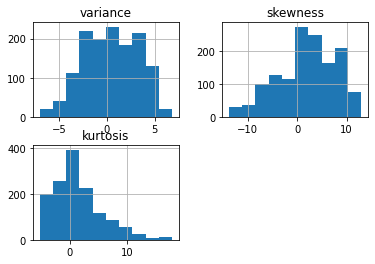

In [72]:
X.hist()

#### the features seem unifrom stable hence we can assume prior normal distribution

In [73]:
X.describe()

variance  skewness  kurtosis
count   1372.00   1372.00   1372.00
mean       0.43      1.92      1.40
std        2.84      5.87      4.31
min       -7.04    -13.77     -5.29
25%       -1.77     -1.71     -1.57
50%        0.50      2.32      0.62
75%        2.82      6.81      3.18
max        6.82     12.95     17.93

In [74]:
y.describe()

count   1372.00
mean       0.44
std        0.50
min        0.00
25%        0.00
50%        0.00
75%        1.00
max        1.00
Name: class, dtype: float64

#### Specific prior 2: with means and standard deviations based on features mean

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 40 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.9998677942349472
Logistic Regression accuracy :  0.9927083333333333
Logistic Regression accuracy for test data :  0.3131067961165049
Logistic Regression AUC-ROC for test data :  0.13901345291479822


'0.99'

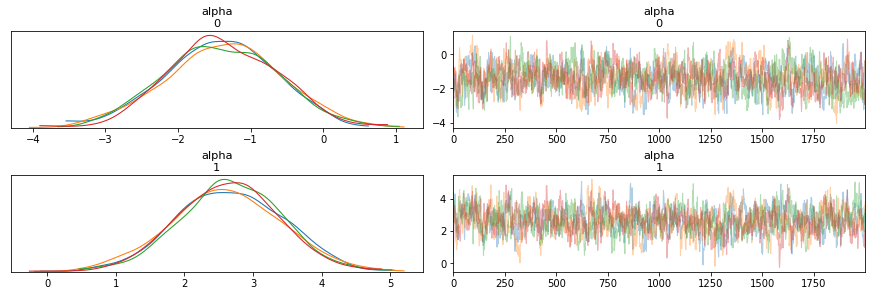

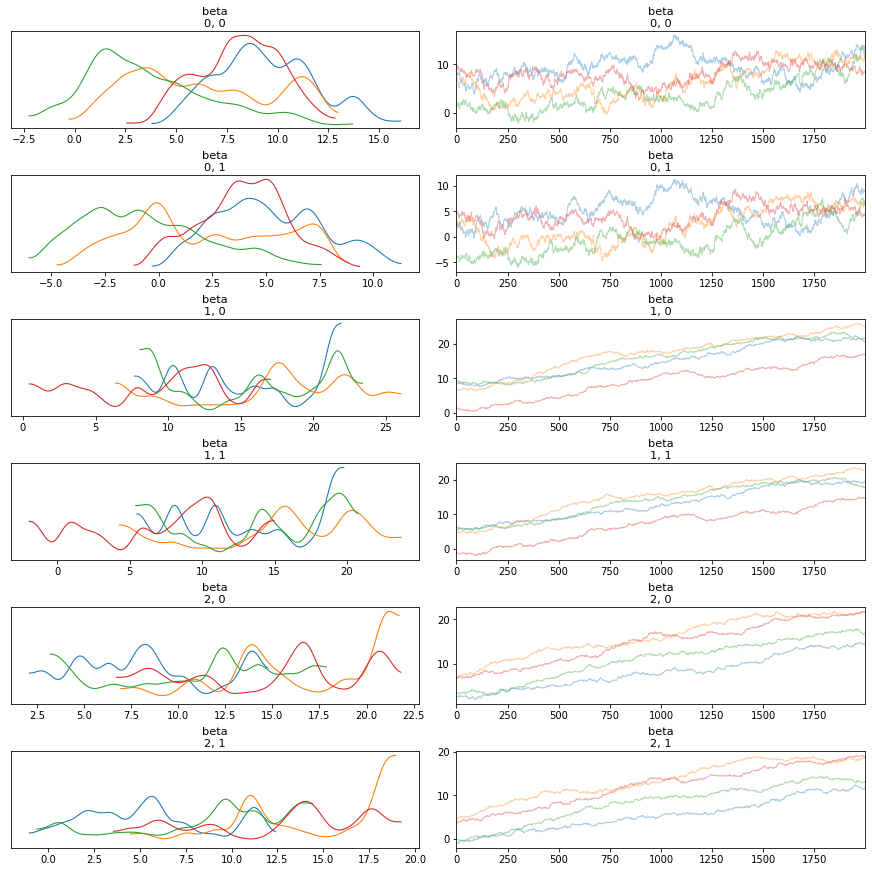

In [75]:
import theano as tt
tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

with pm.Model() as model_mclass:
    alpha = pm.Normal('alpha', mu=0.5, sd=1, shape=2)
    beta = pm.Normal('beta', mu=2, sd=6, shape=(3,2))
    μ = pm.Deterministic('μ', alpha + pm.math.dot(Xv_train, beta))
    θ = tt.tensor.nnet.softmax(μ)
    #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
    yl = pm.Categorical('yl', p=θ, observed=yv_train)
    
    step = pm.Slice()
    trace_s = pm.sample(2000,step)
#     trace_s = pm.sample(2000,step, tune=1000)
    
#     trace_s = pm.sample(2000)

data_pred = trace_s['μ'].mean(0)
y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

p=y_pred
p=np.array(p)
md_probs = p[:,1]
md_auc_train = roc_auc_score(yv_train, md_probs)
print( "Logistic Regression AUC-ROC : ", md_auc_train)

accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
print( "Logistic Regression accuracy : ", accuracy_train)


az.plot_trace(trace_s, var_names=['alpha'])
az.plot_trace(trace_s, var_names=['beta'])
f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'



## Calculating the probs for y=1
a=trace_s['alpha']
a=np.mean(a,0)
alph=a[1]

b=trace_s['beta']
b=np.mean(b,0)
bet=b[:,1]

y_mu = alph + bet[0]*Xv_test[:,0] + bet[1]*Xv_test[:,1]+ bet[2]*Xv_test[:,2]
ep=(1/(1+np.exp(-y_mu)))


dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})


dy.head()

dy.replace([np.inf, -np.inf], np.nan, inplace=True)

dy=dy.dropna()
dy.shape

try:

    md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
    # md_auc_test

    accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
    print( "Logistic Regression accuracy for test data : ",accuracy_test)

    print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
    
except:
    md_auc_test = 'NA'
    accuracy_test='NA'



df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'Slice',
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'model_details':model_mclass},ignore_index=True)


f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'

In [76]:
Xs.describe()

variance  skewness  kurtosis
count   1372.00   1372.00   1372.00
mean       0.00      0.00      0.00
std        1.00      1.00      1.00
min       -2.63     -2.68     -1.55
25%       -0.78     -0.62     -0.69
50%        0.02      0.07     -0.18
75%        0.84      0.83      0.41
max        2.25      1.88      3.84

### Now applying model on dataset with Standard Scalar transformation

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 38 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.9998501667996069
Logistic Regression accuracy :  0.9895833333333334
Logistic Regression accuracy for test data :  0.6650485436893204
Logistic Regression AUC-ROC for test data :  0.7930813581037794


'0.99'

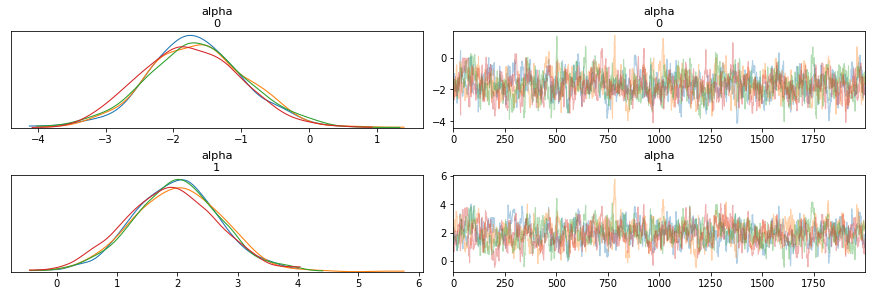

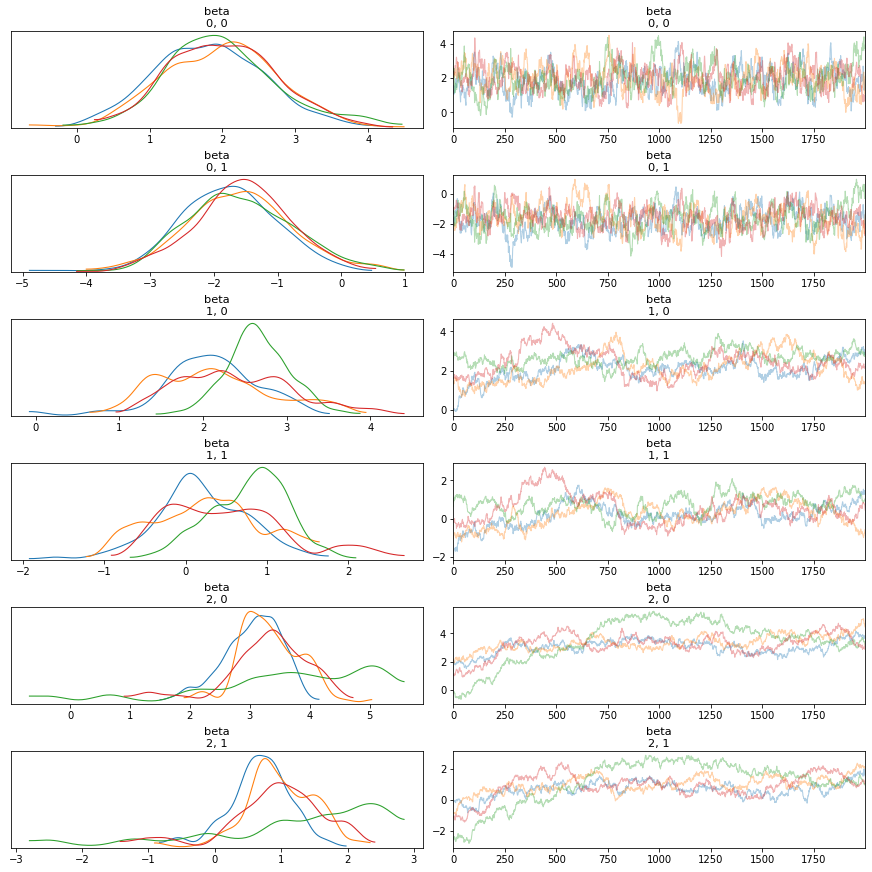

In [77]:
import theano as tt
tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

with pm.Model() as model_mclass:
    alpha = pm.Normal('alpha', mu=0, sd=1, shape=2)
    beta = pm.Normal('beta', mu=0, sd=1, shape=(3,2))
    μ = pm.Deterministic('μ', alpha + pm.math.dot(Xsv_train, beta))
    θ = tt.tensor.nnet.softmax(μ)
    #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
    yl = pm.Categorical('yl', p=θ, observed=yv_train)
    
    step = pm.Slice()
    trace_s = pm.sample(2000,step)
#     trace_s = pm.sample(2000,step, tune=1000)
    
#     trace_s = pm.sample(2000)

data_pred = trace_s['μ'].mean(0)
y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

p=y_pred
p=np.array(p)
md_probs = p[:,1]
md_auc_train = roc_auc_score(yv_train, md_probs)
print( "Logistic Regression AUC-ROC : ", md_auc_train)

accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
print( "Logistic Regression accuracy : ", accuracy_train)


az.plot_trace(trace_s, var_names=['alpha'])
az.plot_trace(trace_s, var_names=['beta'])
f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'



## Calculating the probs for y=1
a=trace_s['alpha']
a=np.mean(a,0)
alph=a[1]

b=trace_s['beta']
b=np.mean(b,0)
bet=b[:,1]

y_mu = alph + bet[0]*Xsv_test[:,0] + bet[1]*Xsv_test[:,1]+ bet[2]*Xsv_test[:,2]
ep=(1/(1+np.exp(-y_mu)))


dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})

dy.head()

dy.replace([np.inf, -np.inf], np.nan, inplace=True)

dy=dy.dropna()
dy.shape

try:

    md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
    # md_auc_test

    accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
    print( "Logistic Regression accuracy for test data : ",accuracy_test)


    print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)
    
except:
    md_auc_test = 'NA'
    accuracy_test='NA'



df_results_r1= df_results_r1.append({'model_name':'Logistic Regression-tain/test dataste','sampling/VI_method':'Slice',
                                     'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                     'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                     'model_details':model_mclass},ignore_index=True)


f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'

In [78]:
df_results_r1

model_name sampling/VI_method  Accuracy_train  \
0  Logistic Regression-tain/test dataste                 NA            0.99   
1  Logistic Regression-tain/test dataste                 NA            0.99   
2  Logistic Regression-tain/test dataste              Slice            0.99   
3  Logistic Regression-tain/test dataste              Slice            0.99   
4  Logistic Regression-tain/test dataste              Slice            0.99   
5  Logistic Regression-tain/test dataste              Slice            0.99   

   AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
0           1.00           0.99          1.00   
1           1.00           0.99          1.00   
2           1.00           0.41          0.28   
3           1.00           0.65          0.73   
4           1.00           0.31          0.14   
5           1.00           0.67          0.79   

                                  model_details  
0                          LogisticRegression()  
1                          LogisticRegression()  
2  <pymc3.model.Model object at 0x7f61848eb0d0>  
3  <pymc3.model.Model object at 0x7f61436a6c90>  
4  <pymc3.model.Model object at 0x7f614fe66b90>  
5  <pymc3.model.Model object at 0x7f61548c68d0>

In [80]:
df_results_r1.tail()

model_name sampling/VI_method  Accuracy_train  \
1  Logistic Regression-tain/test dataste                 NA            0.99   
2  Logistic Regression-tain/test dataste              Slice            0.99   
3  Logistic Regression-tain/test dataste              Slice            0.99   
4  Logistic Regression-tain/test dataste              Slice            0.99   
5  Logistic Regression-tain/test dataste              Slice            0.99   

   AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
1           1.00           0.99          1.00   
2           1.00           0.41          0.28   
3           1.00           0.65          0.73   
4           1.00           0.31          0.14   
5           1.00           0.67          0.79   

                                  model_details  
1                          LogisticRegression()  
2  <pymc3.model.Model object at 0x7f61848eb0d0>  
3  <pymc3.model.Model object at 0x7f61436a6c90>  
4  <pymc3.model.Model object at 0x7f614fe66b90>  
5  <pymc3.model.Model object at 0x7f61548c68d0>

### From the results based on them we see that model with the specific prior on standard scalar transformation dataset performed best. the mean and sd based on dataset

#### We will use this model for further analysis

## Making a MCMC function for our best models

In [81]:
def model_mcmc(sampling):
    
    
    import theano as tt
    tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

    with pm.Model() as model_mclass:
        alpha = pm.Normal('alpha', mu=0, sd=1, shape=2)
        beta = pm.Normal('beta', mu=0, sd=1, shape=(3,2))
        μ = pm.Deterministic('μ', alpha + pm.math.dot(Xsv_train, beta))
        θ = tt.tensor.nnet.softmax(μ)
        #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
        yl = pm.Categorical('yl', p=θ, observed=yv_train)
        
        
        if sampling == 'HMC':
            step = pm.HamiltonianMC()
            
        elif sampling == 'metropolis':
            step = pm.Metropolis()
            
        elif sampling == 'slice':
            step = pm.Slice()
            
        elif sampling == 'NUTS':
            step = pm.NUTS()
        

        trace_s = pm.sample(2000,step)
  

    data_pred = trace_s['μ'].mean(0)
    y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

    p=y_pred
    p=np.array(p)
    md_probs = p[:,1]
    md_auc_train = roc_auc_score(yv_train, md_probs)
    print( "Logistic Regression AUC-ROC : ", md_auc_train)

    accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
    print( "Logistic Regression accuracy : ", accuracy_train)


    az.plot_trace(trace_s, var_names=['alpha'])
    az.plot_trace(trace_s, var_names=['beta'])
    f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'



    ## Calculating the probs for y=1
    a=trace_s['alpha']
    a=np.mean(a,0)
    alph=a[1]

    b=trace_s['beta']
    b=np.mean(b,0)
    bet=b[:,1]

    y_mu = alph + bet[0]*Xsv_test[:,0] + bet[1]*Xsv_test[:,1]+ bet[2]*Xsv_test[:,2]
    ep=(1/(1+np.exp(-y_mu)))


    dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})


    dy.head()

    dy.replace([np.inf, -np.inf], np.nan, inplace=True)

    dy=dy.dropna()
    dy.shape

    try:

        md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
        # md_auc_test

        accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
        print( "Logistic Regression accuracy for test data : ",accuracy_test)

        print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)

    except:
        md_auc_test = 'NA'
        accuracy_test='NA'
        
    global df_results_r1



    df_results_r1= df_results_r1.append({'model_name':str(sampling)+' MLR-standard scalar-train/test datastet (S)',
                                         'sampling/VI_method':sampling,
                                         'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                         'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                         'model_details':model_mclass},ignore_index=True)


    f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'

    

    return(model_mclass)

## Making a function for Variational Inference

In [82]:
def model_vi(vi_method):
    
    vi=vi_method
    
    
    import theano as tt
    tt.config.gcc.cxxflags = "-Wno-c++11-narrowing"

    with pm.Model() as model_mclass:
        alpha = pm.Normal('alpha', mu=0, sd=1, shape=2)
        beta = pm.Normal('beta', mu=0, sd=1, shape=(3,2))
        μ = pm.Deterministic('μ', alpha + pm.math.dot(Xsv_train, beta))
        θ = tt.tensor.nnet.softmax(μ)
        #θ = pm.math.exp(μ)/pm.math.sum(pm.math.exp(μ), axis=0)
        yl = pm.Categorical('yl', p=θ, observed=yv_train)
        
        
        
        
    print('for VI')
    with model_mclass:
        mean_field = pm.fit(method=vi_method) # VI
        

    trace_s=mean_field.sample(10000)    



    data_pred = trace_s['μ'].mean(0)
    y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0) for point in data_pred]

    p=y_pred
    p=np.array(p)
    md_probs = p[:,1]
    md_auc_train = roc_auc_score(yv_train, md_probs)
    print( "Logistic Regression AUC-ROC : ", md_auc_train)

    accuracy_train=accuracy_score(yv_train, np.rint(md_probs))
    print( "Logistic Regression accuracy : ", accuracy_train)


    az.plot_trace(trace_s, var_names=['alpha'])
    az.plot_trace(trace_s, var_names=['beta'])
    f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'



    ## Calculating the probs for y=1
    a=trace_s['alpha']
    a=np.mean(a,0)
    alph=a[1]

    b=trace_s['beta']
    b=np.mean(b,0)
    bet=b[:,1]

    y_mu = alph + bet[0]*Xsv_test[:,0] + bet[1]*Xsv_test[:,1]+ bet[2]*Xsv_test[:,2]
    ep=(1/(1+np.exp(-y_mu)))


    dy=pd.DataFrame({'test_y':yv_test,'predicted_y':ep})


    dy.head()

    dy.replace([np.inf, -np.inf], np.nan, inplace=True)

    dy=dy.dropna()
    dy.shape

    try:

        md_auc_test = roc_auc_score(dy['test_y'], dy['predicted_y'])
        # md_auc_test

        accuracy_test=accuracy_score(dy['test_y'], np.rint(dy['predicted_y']))
        print( "Logistic Regression accuracy for test data : ",accuracy_test)

        print( "Logistic Regression AUC-ROC for test data : ", md_auc_test)

    except:
        md_auc_test = 'NA'
        accuracy_test='NA'
        
    global df_results_r1



    df_results_r1= df_results_r1.append({'model_name':str(vi_method)+' MLR-Robust-Nuts-train/test datastet (G)',
                                         'sampling/VI_method':vi_method,
                                         'Accuracy_test':accuracy_test, 'AUC-ROC_test':md_auc_test,
                                         'Accuracy_train':accuracy_train, 'AUC-ROC_train':md_auc_train,
                                         'model_details':model_mclass},ignore_index=True)


    f'{np.sum(yv_train == np.argmax(y_pred, axis=1)) / len(yv_train):.2f}'
    
    
    
    return(model_mclass)

# MCMC differnet Sampling Methods

## 1 NUTS

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 126 seconds.
There were 66 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
There were 22 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


Logistic Regression AUC-ROC :  0.9998501667996069
Logistic Regression accuracy :  0.9885416666666667
Logistic Regression accuracy for test data :  0.9878640776699029
Logistic Regression AUC-ROC for test data :  0.9995017438963627


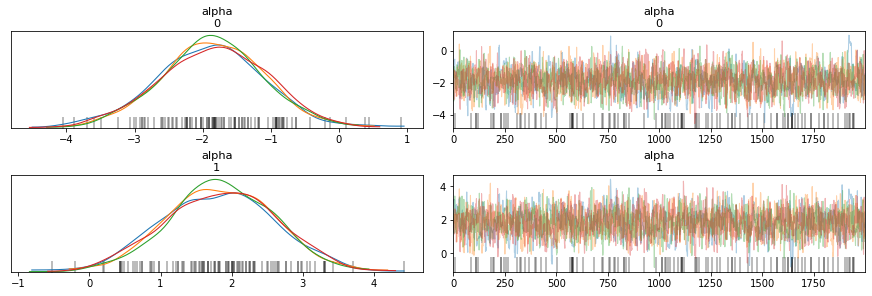

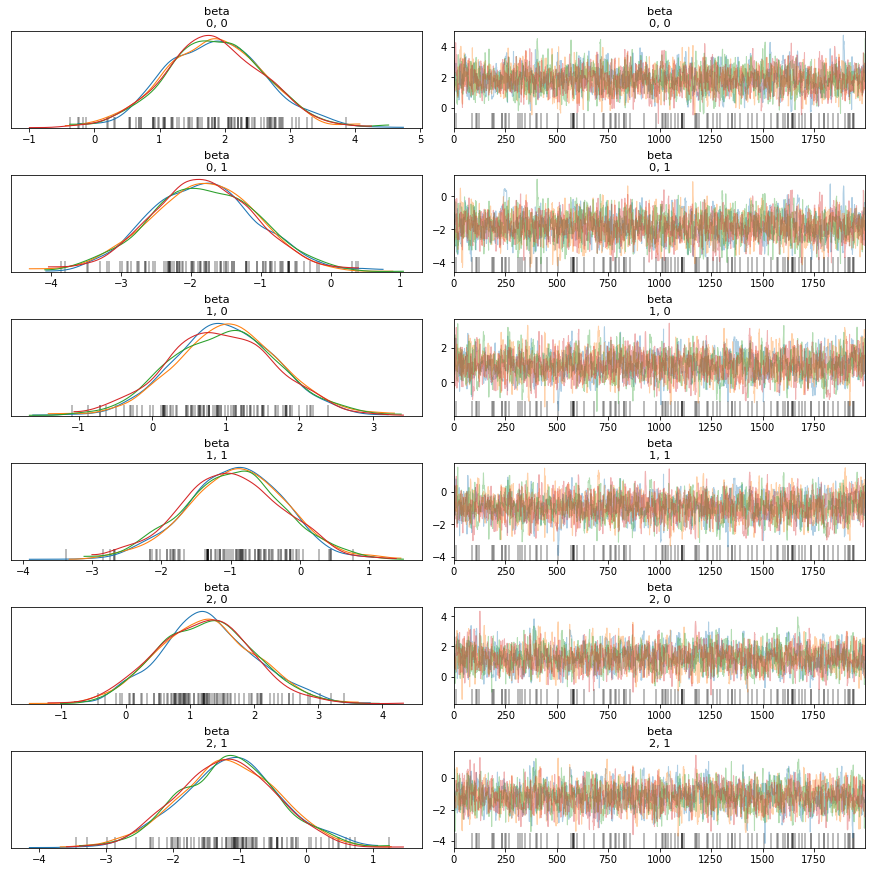

In [83]:
nuts=model_mcmc('NUTS')

In [84]:
model_mclass

In [85]:
df_results_r1.tail()

model_name sampling/VI_method  \
2             Logistic Regression-tain/test dataste              Slice   
3             Logistic Regression-tain/test dataste              Slice   
4             Logistic Regression-tain/test dataste              Slice   
5             Logistic Regression-tain/test dataste              Slice   
6  NUTS MLR-standard scalar-train/test datastet (S)               NUTS   

   Accuracy_train  AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
2            0.99           1.00           0.41          0.28   
3            0.99           1.00           0.65          0.73   
4            0.99           1.00           0.31          0.14   
5            0.99           1.00           0.67          0.79   
6            0.99           1.00           0.99          1.00   

                                  model_details  
2  <pymc3.model.Model object at 0x7f61848eb0d0>  
3  <pymc3.model.Model object at 0x7f61436a6c90>  
4  <pymc3.model.Model object at 0x7f614fe66b90>  
5  <pymc3.model.Model object at 0x7f61548c68d0>  
6  <pymc3.model.Model object at 0x7f61897d1150>

## HMC

Multiprocess sampling (4 chains in 4 jobs)
HamiltonianMC: [beta, alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 94 seconds.
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7514474123812381, but should be close to 0.65. Try to increase the number of tuning steps.
There were 45 divergences after tuning. Increase `target_accept` or reparameterize.
There were 20 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8014101625011281, but should be close to 0.65. Try to increase the number of tuning steps.


Logistic Regression AUC-ROC :  0.9998501667996068
Logistic Regression accuracy :  0.9885416666666667
Logistic Regression accuracy for test data :  0.9902912621359223
Logistic Regression AUC-ROC for test data :  0.9995729233397395


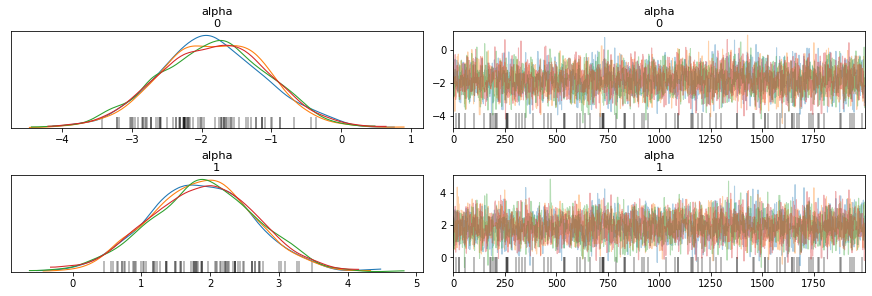

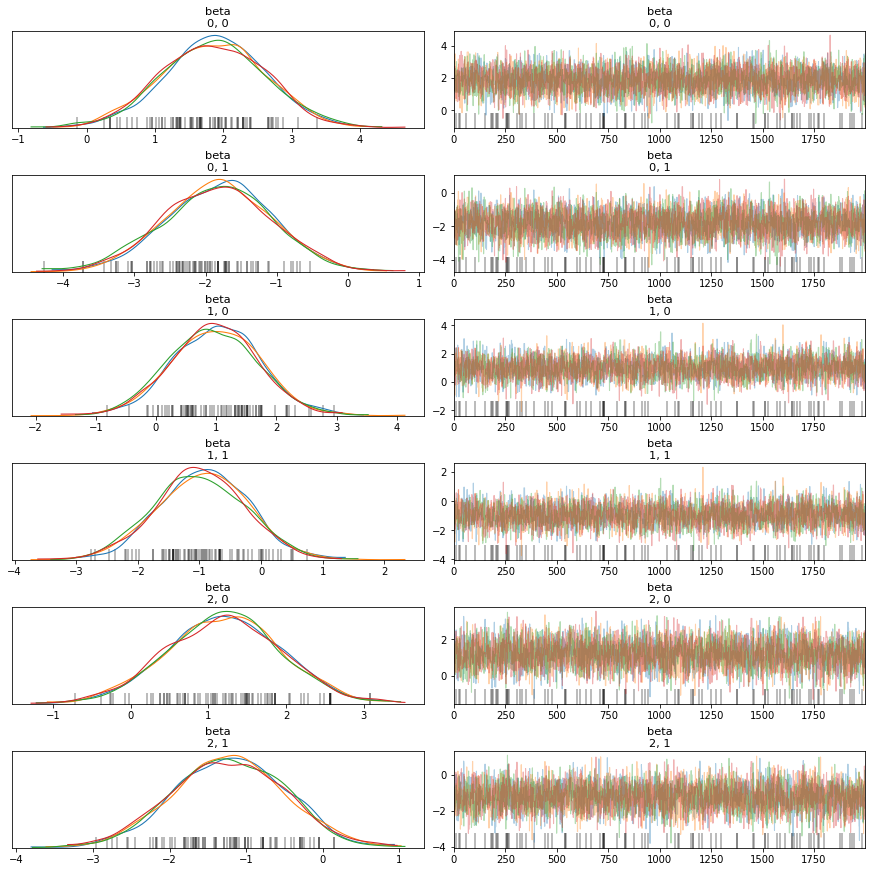

In [86]:
hmc=model_mcmc('HMC')

In [87]:
model_mclass

## Metrolpis

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [beta]
>Metropolis: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 5 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.9998589805172771
Logistic Regression accuracy :  0.9885416666666667
Logistic Regression accuracy for test data :  0.8567961165048543
Logistic Regression AUC-ROC for test data :  0.9568178043514365


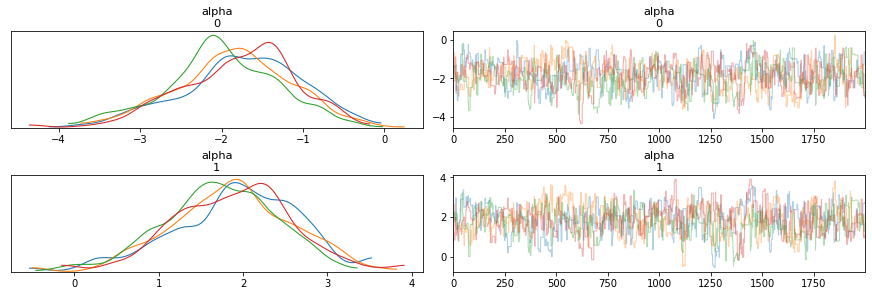

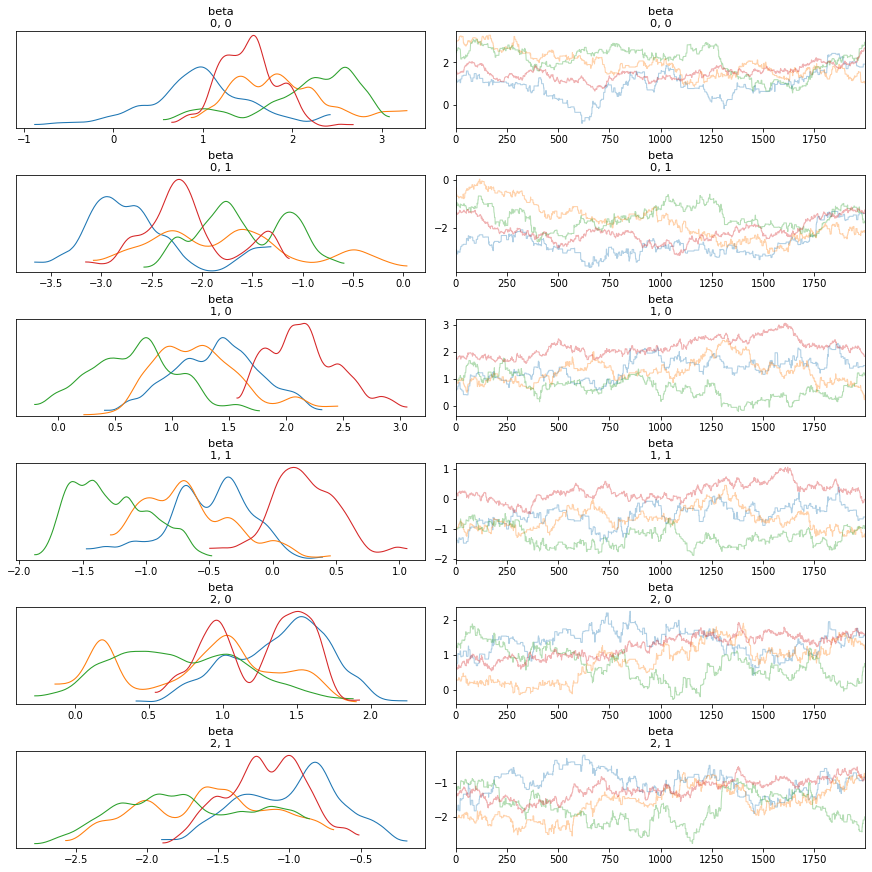

In [88]:
metrolpis=model_mcmc('metropolis')

In [89]:
model_mclass

In [90]:
df_results_r1.tail()

model_name sampling/VI_method  \
4              Logistic Regression-tain/test dataste              Slice   
5              Logistic Regression-tain/test dataste              Slice   
6   NUTS MLR-standard scalar-train/test datastet (S)               NUTS   
7    HMC MLR-standard scalar-train/test datastet (S)                HMC   
8  metropolis MLR-standard scalar-train/test data...         metropolis   

   Accuracy_train  AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
4            0.99           1.00           0.31          0.14   
5            0.99           1.00           0.67          0.79   
6            0.99           1.00           0.99          1.00   
7            0.99           1.00           0.99          1.00   
8            0.99           1.00           0.86          0.96   

                                  model_details  
4  <pymc3.model.Model object at 0x7f614fe66b90>  
5  <pymc3.model.Model object at 0x7f61548c68d0>  
6  <pymc3.model.Model object at 0x7f61897d1150>  
7  <pymc3.model.Model object at 0x7f6146244950>  
8  <pymc3.model.Model object at 0x7f6154971c90>

## Slice

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [beta]
>Slice: [alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 44 seconds.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


Logistic Regression AUC-ROC :  0.9998501667996068
Logistic Regression accuracy :  0.9885416666666667
Logistic Regression accuracy for test data :  0.6868932038834952
Logistic Regression AUC-ROC for test data :  0.8207464350962108


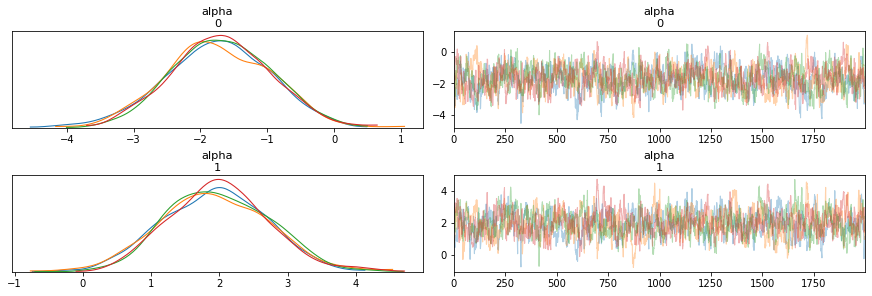

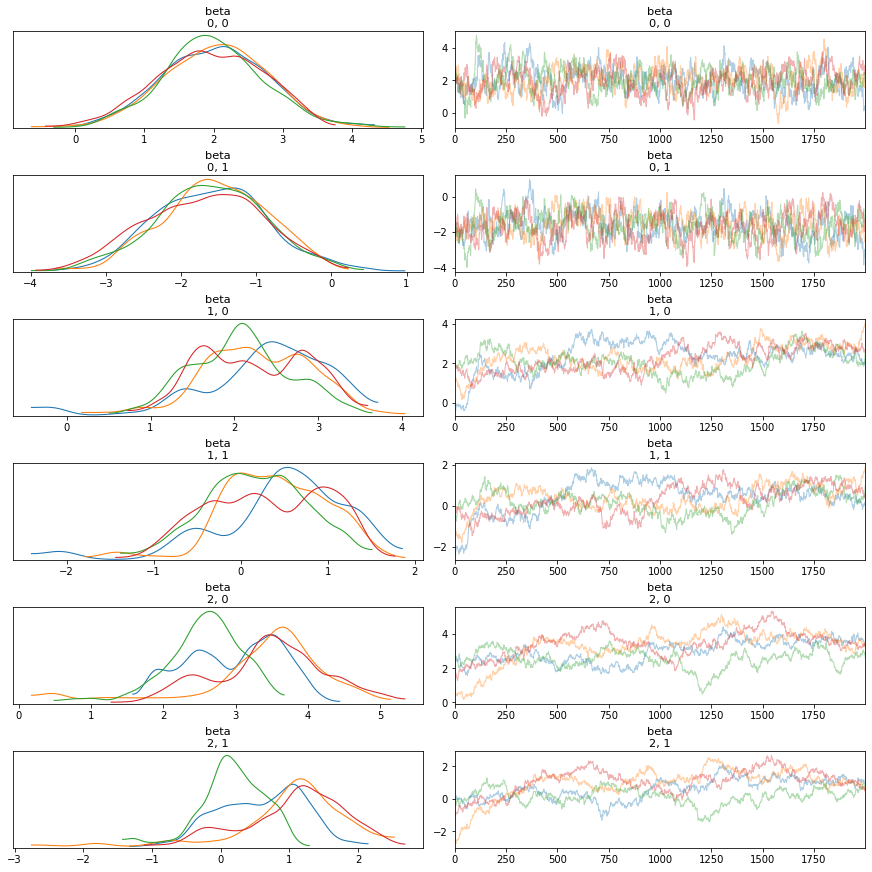

In [91]:
slice= model_mcmc('slice')

# Variational Inference Methods

## ADVI

for VI


Finished [100%]: Average Loss = 122.21


Logistic Regression AUC-ROC :  0.9989511675972483
Logistic Regression accuracy :  0.9791666666666666
Logistic Regression accuracy for test data :  0.9805825242718447
Logistic Regression AUC-ROC for test data :  0.99817306095333


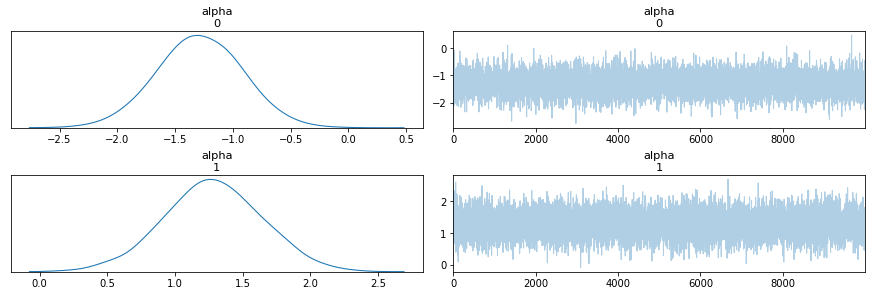

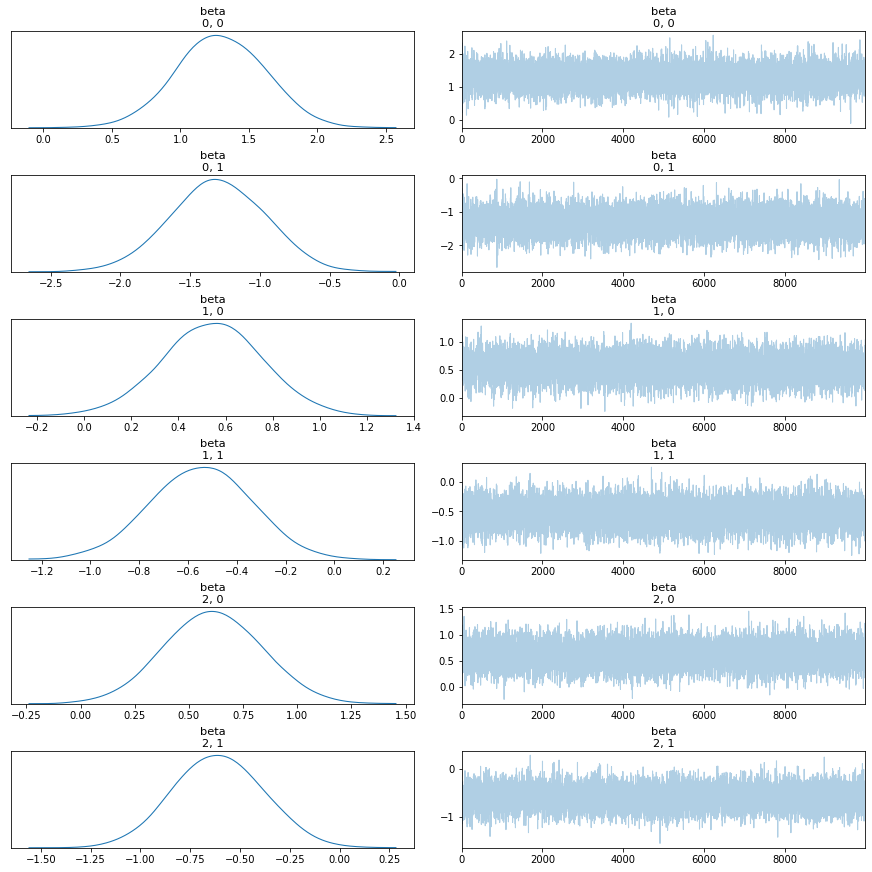

In [92]:
advi=model_vi('advi')

## fullrank advi

for VI


Finished [100%]: Average Loss = 41.869


Logistic Regression AUC-ROC :  0.9998369462231016
Logistic Regression accuracy :  0.990625
Logistic Regression accuracy for test data :  0.9878640776699029
Logistic Regression AUC-ROC for test data :  0.9995491968586139


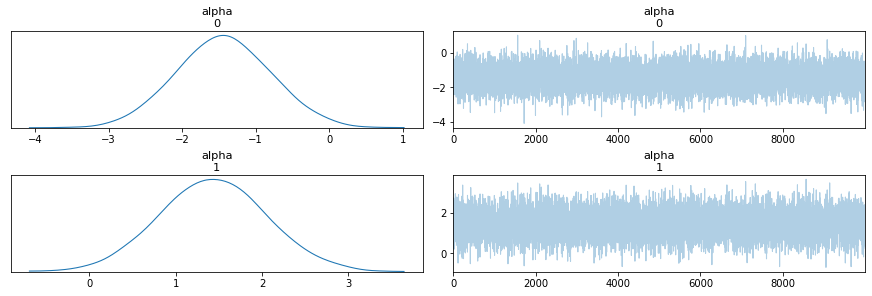

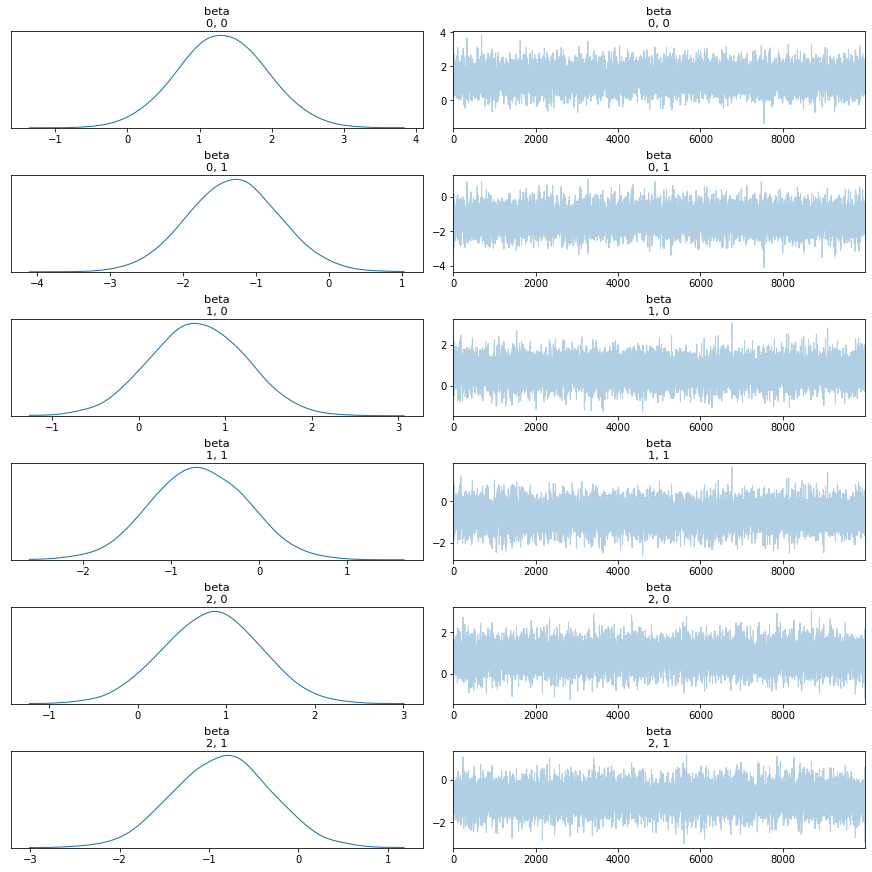

In [93]:
fr_advi=model_vi('fullrank_advi')

## svgd

for VI


Logistic Regression AUC-ROC :  0.9998501667996068
Logistic Regression accuracy :  0.9885416666666667
Logistic Regression accuracy for test data :  0.9854368932038835
Logistic Regression AUC-ROC for test data :  0.9995254703774883


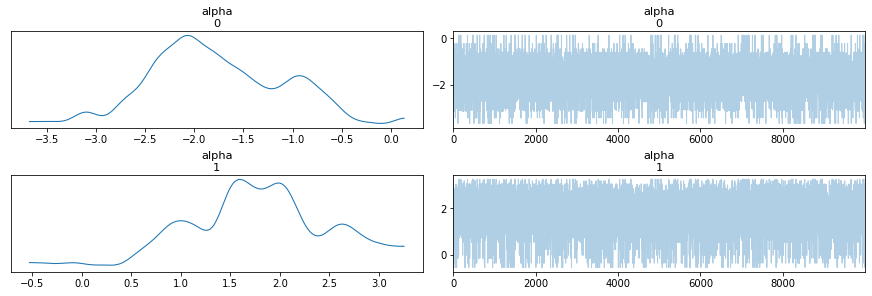

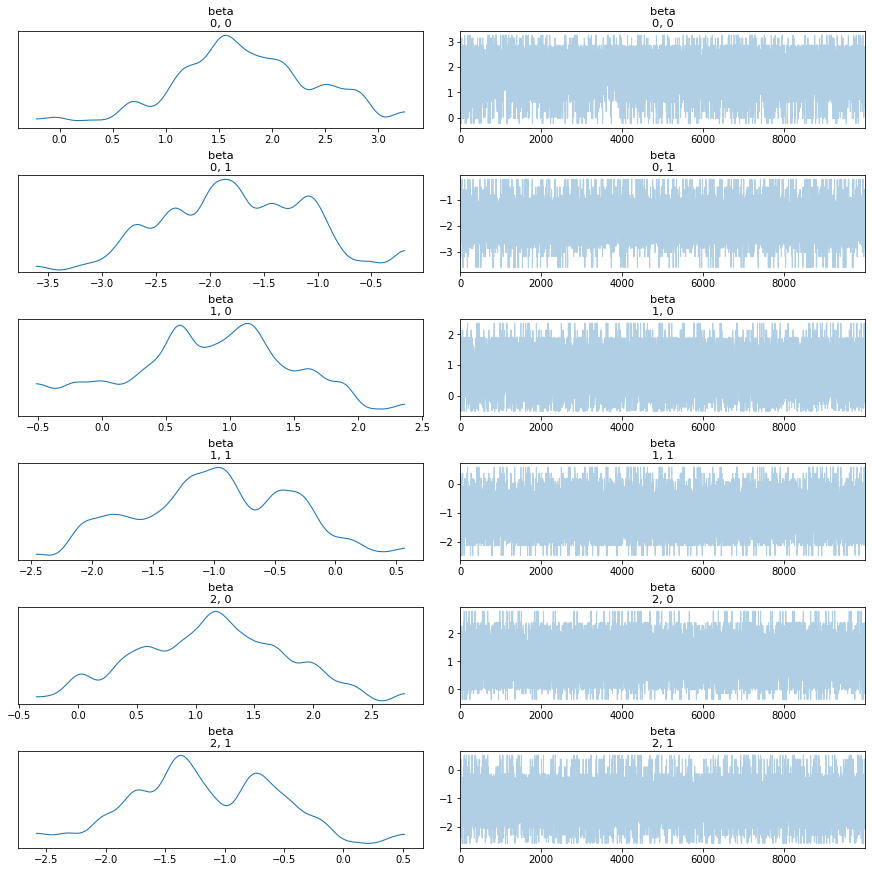

In [94]:
svgd= model_vi('svgd')

In [95]:
pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', 500)

In [96]:
df_results_r1

model_name sampling/VI_method  \
0                    Logistic Regression-tain/test dataste                 NA   
1                    Logistic Regression-tain/test dataste                 NA   
2                    Logistic Regression-tain/test dataste              Slice   
3                    Logistic Regression-tain/test dataste              Slice   
4                    Logistic Regression-tain/test dataste              Slice   
5                    Logistic Regression-tain/test dataste              Slice   
6         NUTS MLR-standard scalar-train/test datastet (S)               NUTS   
7          HMC MLR-standard scalar-train/test datastet (S)                HMC   
8   metropolis MLR-standard scalar-train/test datastet (S)         metropolis   
9        slice MLR-standard scalar-train/test datastet (S)              slice   
10            advi MLR-Robust-Nuts-train/test datastet (G)               advi   
11   fullrank_advi MLR-Robust-Nuts-train/test datastet (G)      fullrank_advi   
12            svgd MLR-Robust-Nuts-train/test datastet (G)               svgd   

    Accuracy_train  AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
0             0.99           1.00           0.99          1.00   
1             0.99           1.00           0.99          1.00   
2             0.99           1.00           0.41          0.28   
3             0.99           1.00           0.65          0.73   
4             0.99           1.00           0.31          0.14   
5             0.99           1.00           0.67          0.79   
6             0.99           1.00           0.99          1.00   
7             0.99           1.00           0.99          1.00   
8             0.99           1.00           0.86          0.96   
9             0.99           1.00           0.69          0.82   
10            0.98           1.00           0.98          1.00   
11            0.99           1.00           0.99          1.00   
12            0.99           1.00           0.99          1.00   

                                   model_details  
0                           LogisticRegression()  
1                           LogisticRegression()  
2   <pymc3.model.Model object at 0x7f61848eb0d0>  
3   <pymc3.model.Model object at 0x7f61436a6c90>  
4   <pymc3.model.Model object at 0x7f614fe66b90>  
5   <pymc3.model.Model object at 0x7f61548c68d0>  
6   <pymc3.model.Model object at 0x7f61897d1150>  
7   <pymc3.model.Model object at 0x7f6146244950>  
8   <pymc3.model.Model object at 0x7f6154971c90>  
9   <pymc3.model.Model object at 0x7f61888e6310>  
10  <pymc3.model.Model object at 0x7f614ed4c090>  
11  <pymc3.model.Model object at 0x7f615442f390>  
12  <pymc3.model.Model object at 0x7f614e035510>

In [97]:
df_results_r1

model_name sampling/VI_method  \
0                    Logistic Regression-tain/test dataste                 NA   
1                    Logistic Regression-tain/test dataste                 NA   
2                    Logistic Regression-tain/test dataste              Slice   
3                    Logistic Regression-tain/test dataste              Slice   
4                    Logistic Regression-tain/test dataste              Slice   
5                    Logistic Regression-tain/test dataste              Slice   
6         NUTS MLR-standard scalar-train/test datastet (S)               NUTS   
7          HMC MLR-standard scalar-train/test datastet (S)                HMC   
8   metropolis MLR-standard scalar-train/test datastet (S)         metropolis   
9        slice MLR-standard scalar-train/test datastet (S)              slice   
10            advi MLR-Robust-Nuts-train/test datastet (G)               advi   
11   fullrank_advi MLR-Robust-Nuts-train/test datastet (G)      fullrank_advi   
12            svgd MLR-Robust-Nuts-train/test datastet (G)               svgd   

    Accuracy_train  AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
0             0.99           1.00           0.99          1.00   
1             0.99           1.00           0.99          1.00   
2             0.99           1.00           0.41          0.28   
3             0.99           1.00           0.65          0.73   
4             0.99           1.00           0.31          0.14   
5             0.99           1.00           0.67          0.79   
6             0.99           1.00           0.99          1.00   
7             0.99           1.00           0.99          1.00   
8             0.99           1.00           0.86          0.96   
9             0.99           1.00           0.69          0.82   
10            0.98           1.00           0.98          1.00   
11            0.99           1.00           0.99          1.00   
12            0.99           1.00           0.99          1.00   

                                   model_details  
0                           LogisticRegression()  
1                           LogisticRegression()  
2   <pymc3.model.Model object at 0x7f61848eb0d0>  
3   <pymc3.model.Model object at 0x7f61436a6c90>  
4   <pymc3.model.Model object at 0x7f614fe66b90>  
5   <pymc3.model.Model object at 0x7f61548c68d0>  
6   <pymc3.model.Model object at 0x7f61897d1150>  
7   <pymc3.model.Model object at 0x7f6146244950>  
8   <pymc3.model.Model object at 0x7f6154971c90>  
9   <pymc3.model.Model object at 0x7f61888e6310>  
10  <pymc3.model.Model object at 0x7f614ed4c090>  
11  <pymc3.model.Model object at 0x7f615442f390>  
12  <pymc3.model.Model object at 0x7f614e035510>

In [98]:
df_results_r1_a=df_results_r1.sort_values('Accuracy_test',ascending=False)

df_results_r1_a


model_name sampling/VI_method  \
7          HMC MLR-standard scalar-train/test datastet (S)                HMC   
0                    Logistic Regression-tain/test dataste                 NA   
1                    Logistic Regression-tain/test dataste                 NA   
6         NUTS MLR-standard scalar-train/test datastet (S)               NUTS   
11   fullrank_advi MLR-Robust-Nuts-train/test datastet (G)      fullrank_advi   
12            svgd MLR-Robust-Nuts-train/test datastet (G)               svgd   
10            advi MLR-Robust-Nuts-train/test datastet (G)               advi   
8   metropolis MLR-standard scalar-train/test datastet (S)         metropolis   
9        slice MLR-standard scalar-train/test datastet (S)              slice   
5                    Logistic Regression-tain/test dataste              Slice   
3                    Logistic Regression-tain/test dataste              Slice   
2                    Logistic Regression-tain/test dataste              Slice   
4                    Logistic Regression-tain/test dataste              Slice   

    Accuracy_train  AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
7             0.99           1.00           0.99          1.00   
0             0.99           1.00           0.99          1.00   
1             0.99           1.00           0.99          1.00   
6             0.99           1.00           0.99          1.00   
11            0.99           1.00           0.99          1.00   
12            0.99           1.00           0.99          1.00   
10            0.98           1.00           0.98          1.00   
8             0.99           1.00           0.86          0.96   
9             0.99           1.00           0.69          0.82   
5             0.99           1.00           0.67          0.79   
3             0.99           1.00           0.65          0.73   
2             0.99           1.00           0.41          0.28   
4             0.99           1.00           0.31          0.14   

                                   model_details  
7   <pymc3.model.Model object at 0x7f6146244950>  
0                           LogisticRegression()  
1                           LogisticRegression()  
6   <pymc3.model.Model object at 0x7f61897d1150>  
11  <pymc3.model.Model object at 0x7f615442f390>  
12  <pymc3.model.Model object at 0x7f614e035510>  
10  <pymc3.model.Model object at 0x7f614ed4c090>  
8   <pymc3.model.Model object at 0x7f6154971c90>  
9   <pymc3.model.Model object at 0x7f61888e6310>  
5   <pymc3.model.Model object at 0x7f61548c68d0>  
3   <pymc3.model.Model object at 0x7f61436a6c90>  
2   <pymc3.model.Model object at 0x7f61848eb0d0>  
4   <pymc3.model.Model object at 0x7f614fe66b90>

In [99]:
df_results_r1_a=df_results_r1.sort_values('AUC-ROC_test',ascending=False)

df_results_r1_a

model_name sampling/VI_method  \
0                    Logistic Regression-tain/test dataste                 NA   
1                    Logistic Regression-tain/test dataste                 NA   
7          HMC MLR-standard scalar-train/test datastet (S)                HMC   
11   fullrank_advi MLR-Robust-Nuts-train/test datastet (G)      fullrank_advi   
12            svgd MLR-Robust-Nuts-train/test datastet (G)               svgd   
6         NUTS MLR-standard scalar-train/test datastet (S)               NUTS   
10            advi MLR-Robust-Nuts-train/test datastet (G)               advi   
8   metropolis MLR-standard scalar-train/test datastet (S)         metropolis   
9        slice MLR-standard scalar-train/test datastet (S)              slice   
5                    Logistic Regression-tain/test dataste              Slice   
3                    Logistic Regression-tain/test dataste              Slice   
2                    Logistic Regression-tain/test dataste              Slice   
4                    Logistic Regression-tain/test dataste              Slice   

    Accuracy_train  AUC-ROC_train  Accuracy_test  AUC-ROC_test  \
0             0.99           1.00           0.99          1.00   
1             0.99           1.00           0.99          1.00   
7             0.99           1.00           0.99          1.00   
11            0.99           1.00           0.99          1.00   
12            0.99           1.00           0.99          1.00   
6             0.99           1.00           0.99          1.00   
10            0.98           1.00           0.98          1.00   
8             0.99           1.00           0.86          0.96   
9             0.99           1.00           0.69          0.82   
5             0.99           1.00           0.67          0.79   
3             0.99           1.00           0.65          0.73   
2             0.99           1.00           0.41          0.28   
4             0.99           1.00           0.31          0.14   

                                   model_details  
0                           LogisticRegression()  
1                           LogisticRegression()  
7   <pymc3.model.Model object at 0x7f6146244950>  
11  <pymc3.model.Model object at 0x7f615442f390>  
12  <pymc3.model.Model object at 0x7f614e035510>  
6   <pymc3.model.Model object at 0x7f61897d1150>  
10  <pymc3.model.Model object at 0x7f614ed4c090>  
8   <pymc3.model.Model object at 0x7f6154971c90>  
9   <pymc3.model.Model object at 0x7f61888e6310>  
5   <pymc3.model.Model object at 0x7f61548c68d0>  
3   <pymc3.model.Model object at 0x7f61436a6c90>  
2   <pymc3.model.Model object at 0x7f61848eb0d0>  
4   <pymc3.model.Model object at 0x7f614fe66b90>

In [100]:
# save the final data
df_results_r1.to_csv('df_results_c3.csv',index=False)

## Conclusion

#### We can see that both MCMC and VI models have performed better 
#### Also we see the performance of MCMC is at par and a bit better than normal Logistic Regression
#### HMC Sampling method and Full rank ADVI method gave best result in MCMC model